# Contexto

Con el objetivo de reconocer patrones asociados a enfermedades psiquiatricas se realiza un Análisis de Componentes Principales (PCA) de lecturas de datos de Encefalogramas (EEG). Según la descripción del paper "Identification of Major Psychiatric Disorders From Resting-State Electroencephalography Using a Machine Learning Approach" almacenado en https://www.frontiersin.org/articles/10.3389/fpsyt.2021.707581/full, el conjunto de datos considera una muestra de 945 sujetos divididos en 2 grupos: 850 pacientes con trastornos psiquiátricos mayores (6 trastornos categóricos grandes y 9 específicos) y 95 controles sanos (HC).

# Obtener los datos

## Librerías

En esta sección se pueden ver las librerías necesarias para el correcto funciionamiento del código fuente.

In [1624]:
#Import the neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor


## Carga de Datos

Se realizó la descarga de la base de datos alojada en https://osf.io/8bsvr/. Posteriormete se almacenó el archivo en la carpeta Dataset dentro de la ruta local del proyecto, finalmente se realizó la carga del archivo csv y se almacenó en la variable data.

In [1625]:
#Load the dataset 
data = pd.read_csv("Datasets/EEG.machinelearing_data_BRMH.csv")


# Exploración de los Datos

Con el objetivo de comprobar la calidad de la información, se realiza un muestreo general de la información descargada. Se pudo determinar que la cantidad de filas corresponde a los datos entregados por el artículo, con una extensión 945 Filas x 1149 Columnas.

In [1626]:
#show information about the dataset such as data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1149 entries, no. to COH.F.gamma.r.O1.s.O2
dtypes: float64(1144), int64(1), object(4)
memory usage: 8.3+ MB


Una vez confirmada la dimensionalidad de la base de datos, se procede a conocer la información estadística del dataset. Para ello, se observan las primeras 5 y las útlimas 5 filas del dataset. Posteriormente se realiza una descripción general de los datos para conocer su estado.

In [1627]:
data.head()

no. sex   age    eeg.date  education     IQ       main.disorder  \
0    1   M  57.0   2012.8.30        NaN    NaN  Addictive disorder   
1    2   M  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2    3   M  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3    4   M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4    5   M  36.0  2012.10.18       16.0  112.0  Addictive disorder   

      specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  \
0  Alcohol use disorder         35.998557         21.717375  ...   
1  Alcohol use disorder         13.425118         11.002916  ...   
2  Alcohol use disorder         29.941780         27.544684  ...   
3  Alcohol use disorder         21.496226         21.846832  ...   
4  Alcohol use disorder         37.775667         33.607679  ...   

   COH.F.gamma.o.Pz.p.P4  COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  \
0              55.989192              16.739679              23.452271   
1              45.595619              17.510824              26.777368   
2              99.475453              70.654171              39.131547   
3              59.986561              63.822201              36.478254   
4              61.462720              59.166097              51.465531   

   COH.F.gamma.o.Pz.s.O2  COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  \
0              45.678820              30.167520              16.918761   
1              28.201062              57.108861              32.375401   
2              69.920996              71.063644              38.534505   
3              47.117006              84.658376              24.724096   
4              58.635415              80.685608              62.138436   

   COH.F.gamma.p.P4.s.O2  COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  \
0              48.850427               9.422630              34.507082   
1              60.351749              13.900981              57.831848   
2              69.908764              27.180532              64.803155   
3              50.299349              35.319695              79.822944   
4              75.888749              61.003944              87.455509   

   COH.F.gamma.r.O1.s.O2  
0              28.613029  
1              43.463261  
2              31.485799  
3              41.141873  
4              70.531662  

[5 rows x 1149 columns]

In [1628]:
#show the last 5 rows of the dataset
data.tail()

no. sex   age    eeg.date  education     IQ    main.disorder  \
940  941   M  22.0   2014.8.28       13.0  116.0  Healthy control   
941  942   M  26.0   2014.9.19       13.0  118.0  Healthy control   
942  943   M  26.0   2014.9.27       16.0  113.0  Healthy control   
943  944   M  24.0   2014.9.20       13.0  107.0  Healthy control   
944  945   M  21.0  2015.10.23       13.0  105.0  Healthy control   

    specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  \
940   Healthy control         41.851823         36.771496  ...   
941   Healthy control         18.986856         19.401387  ...   
942   Healthy control         28.781317         32.369230  ...   
943   Healthy control         19.929100         25.196375  ...   
944   Healthy control         65.195346         69.241972  ...   

     COH.F.gamma.o.Pz.p.P4  COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  \
940              82.905657              34.850706              63.970519   
941              65.917918              66.700117              44.756285   
942              61.040959              27.632209              45.552852   
943              99.113664              48.328934              41.248470   
944              78.600293              68.255430              70.687410   

     COH.F.gamma.o.Pz.s.O2  COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  \
940              63.982003              51.244725              62.203684   
941              49.787513              98.905995              54.021304   
942              33.638817              46.690983              19.382928   
943              28.192238              48.665743              42.007147   
944              74.433908              74.294750              53.254681   

     COH.F.gamma.p.P4.s.O2  COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  \
940              62.062237              31.013031              31.183413   
941              93.902401              52.740396              92.807331   
942              41.050717               7.045821              41.962451   
943              28.735945              27.176500              27.529522   
944              72.755265              47.810386              80.166825   

     COH.F.gamma.r.O1.s.O2  
940              98.325230  
941              56.320868  
942              19.092111  
943              20.028446  
944              64.380273  

[5 rows x 1149 columns]

In [1629]:
#show statistical information about the dataset
data.describe()

no.         age   education          IQ  AB.A.delta.a.FP1  \
count  945.000000  945.000000  930.000000  932.000000        945.000000   
mean   473.000000   30.594804   13.438710  101.580472         20.182936   
std    272.942302   11.781592    2.550461   17.022414         11.282022   
min      1.000000   18.000000    0.000000   49.000000          3.272260   
25%    237.000000   21.730000   12.000000   91.000000         12.784872   
50%    473.000000   26.150000   13.000000  102.000000         17.065286   
75%    709.000000   35.450000   16.000000  114.000000         24.492760   
max    945.000000   71.880000   20.000000  145.000000         92.826192   

       AB.A.delta.b.FP2  AB.A.delta.c.F7  AB.A.delta.d.F3  AB.A.delta.e.Fz  \
count        945.000000       945.000000       945.000000       945.000000   
mean          21.177584        17.749553        18.901698        20.447079   
std           12.230662        10.003598         9.079482         9.742912   
min            3.244199         3.050507         3.412618         5.066593   
25%           13.019269        11.134327        12.460586        13.548645   
50%           17.838251        15.541469        16.733004        18.065276   
75%           25.654394        21.623961        23.347900        25.573096   
max          101.515687        91.373456        82.544167       101.566662   

       AB.A.delta.f.F4  ...  COH.F.gamma.o.Pz.p.P4  COH.F.gamma.o.Pz.q.T6  \
count       945.000000  ...             945.000000             945.000000   
mean         19.490329  ...              75.889633              55.049113   
std           9.252500  ...              15.861641              19.541956   
min           4.048931  ...              12.611954               0.519048   
25%          12.637717  ...              68.014443              41.607506   
50%          17.432568  ...              78.647712              55.158858   
75%          23.956748  ...              87.398387              69.740640   
max          77.197502  ...              99.678649             100.000000   

       COH.F.gamma.o.Pz.r.O1  COH.F.gamma.o.Pz.s.O2  COH.F.gamma.p.P4.q.T6  \
count             945.000000             945.000000             945.000000   
mean               56.959796              60.739169              69.829254   
std                18.326785              18.052887              17.725321   
min                 6.926792               0.708008               2.421748   
25%                43.682444              48.374883              58.937785   
50%                56.657348              61.257972              72.298636   
75%                70.649245              73.979100              83.066877   
max                99.307895             100.000000              99.581629   

       COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  COH.F.gamma.q.T6.r.O1  \
count             945.000000             945.000000             945.000000   
mean               47.862489              66.832798              39.301406   
std                19.685722              17.028701              20.790933   
min                 0.036664               1.032207               1.228502   
25%                32.581046              55.872070              22.049743   
50%                45.719426              68.238375              36.549938   
75%                62.081839              79.192418              54.169209   
max                98.720067              99.650154              98.413320   

       COH.F.gamma.q.T6.s.O2  COH.F.gamma.r.O1.s.O2  
count             945.000000             945.000000  
mean               66.153213              57.056207  
std                18.088548              19.600107  
min                 0.363268               3.988805  
25%                54.710605              43.955229  
50%                67.988937              57.515871  
75%                79.527764              71.626382  
max               100.000000              99.287092  

[8 rows x 1145 columns]

A primeras podemos observar que el conjunto presenta datos faltantes en las columnas "education" e "IQ". De esta observación nace la hipótesis de que el dataset puede tener otras categorías con datos faltantes, en este sentido, se decide realizar una comprobación general de datos faltantes.

# Revisión de datos faltantes

Para comenzar con el análisis de datos faltantes, se procede a imprimir aquellas categorias que presenten valores nulos.

In [1630]:
#print all columns in the dataset where values are missing
data.columns[data.isnull().any()]

Index(['education', 'IQ', 'Unnamed: 122'], dtype='object')

Podemos notar que existe una tercera categoria con valores faltantes, esta es "Unnamed: 122". Ahora que sabemos que existen 3 categorías con datos faltantes, se imprime cada una de ellas por sepadado, con la finalidad de conocer la extensión de filas con datos faltantes.

In [1631]:
#print the rows where education have missing values
data[data['education'].isnull()]

no. sex    age    eeg.date  education     IQ  \
0      1   M  57.00   2012.8.30        NaN    NaN   
17    18   M  30.00   2013.9.27        NaN   86.0   
21    22   M  20.00  2014.10.23        NaN  116.0   
155  156   M  18.00   2013.12.7        NaN  103.0   
173  174   M  23.00  2015.11.14        NaN  113.0   
269  270   M  25.00   2015.9.23        NaN   85.0   
270  271   M  34.00   2015.9.21        NaN  120.0   
279  280   M  35.00    2016.6.2        NaN    NaN   
280  281   M  37.00   2016.6.27        NaN  110.0   
281  282   M  22.00   2016.6.30        NaN  107.0   
384  385   F  51.38  2011.12.27        NaN   97.0   
417  418   F  53.67   2013.4.18        NaN  101.0   
433  434   M  34.16   2013.4.11        NaN  142.0   
845  846   M  21.29   2013.3.25        NaN   82.0   
920  921   M  24.00    2013.2.1        NaN  114.0   

                          main.disorder               specific.disorder  \
0                    Addictive disorder            Alcohol use disorder   
17                   Addictive disorder            Alcohol use disorder   
21                   Addictive disorder            Alcohol use disorder   
155                  Addictive disorder   Behavioral addiction disorder   
173                     Healthy control                 Healthy control   
269       Obsessive compulsive disorder  Obsessive compulsitve disorder   
270       Obsessive compulsive disorder  Obsessive compulsitve disorder   
279       Obsessive compulsive disorder  Obsessive compulsitve disorder   
280       Obsessive compulsive disorder  Obsessive compulsitve disorder   
281       Obsessive compulsive disorder  Obsessive compulsitve disorder   
384                       Mood disorder             Depressive disorder   
417  Trauma and stress related disorder   Posttraumatic stress disorder   
433                    Anxiety disorder                  Panic disorder   
845                       Mood disorder                Bipolar disorder   
920                     Healthy control                 Healthy control   

     AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  COH.F.gamma.o.Pz.p.P4  \
0           35.998557         21.717375  ...              55.989192   
17          12.443237         12.503703  ...              85.080600   
21          28.287190         22.412264  ...              33.065475   
155         16.548803         19.042179  ...              93.825121   
173         19.050158         23.277470  ...              68.005720   
269          6.186264          7.112847  ...              72.743284   
270         12.784872         15.922964  ...              72.409132   
279         21.524573         22.227615  ...              90.934877   
280         11.971083         11.374465  ...              91.150863   
281         12.516343         10.136242  ...              96.419647   
384         22.447072         23.372886  ...              69.824733   
417         28.945841         27.827136  ...              79.557166   
433         11.321486         12.876858  ...              75.572855   
845         19.273073         22.619817  ...              77.218730   
920         12.365246         12.376312  ...              39.047998   

     COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  COH.F.gamma.o.Pz.s.O2  \
0                16.739679              23.452271              45.678820   
17               53.533875              62.817411              68.040950   
21               24.351780              18.764173              32.610337   
155              79.091595              83.132315              88.900783   
173              54.685472              70.694110              62.676608   
269              63.723838              61.257858              67.473157   
270              49.265064              41.222401              68.010480   
279              93.568209              94.185299              92.271775   
280              78.359575              64.861521              74.389105   
281              77.360976              95.156801         

In [1632]:
#print the rows where IQ have missing values
data[data['IQ'].isnull()]

no. sex    age    eeg.date  education  IQ  \
0      1   M  57.00   2012.8.30        NaN NaN   
33    34   F  19.26    2013.8.5       12.0 NaN   
38    39   F  19.47   2014.5.26       12.0 NaN   
42    43   F  32.94  2014.10.16       16.0 NaN   
43    44   F  22.65   2014.11.8       13.0 NaN   
60    61   M  34.00   2016.3.10       12.0 NaN   
92    93   F  39.18    2017.3.3       16.0 NaN   
93    94   F  28.42   2017.3.20        9.0 NaN   
223  224   M  19.00   2016.7.12       12.0 NaN   
225  226   M  20.00   2016.9.13       13.0 NaN   
234  235   M  20.00  2017.11.22       13.0 NaN   
278  279   M  21.00   2016.5.13       15.0 NaN   
279  280   M  35.00    2016.6.2        NaN NaN   

                          main.disorder               specific.disorder  \
0                    Addictive disorder            Alcohol use disorder   
33   Trauma and stress related disorder           Acute stress disorder   
38   Trauma and stress related disorder           Acute stress disorder   
42   Trauma and stress related disorder           Acute stress disorder   
43   Trauma and stress related disorder           Acute stress disorder   
60                   Addictive disorder            Alcohol use disorder   
92                        Mood disorder             Depressive disorder   
93                        Mood disorder             Depressive disorder   
223                  Addictive disorder   Behavioral addiction disorder   
225                  Addictive disorder   Behavioral addiction disorder   
234                  Addictive disorder   Behavioral addiction disorder   
278       Obsessive compulsive disorder  Obsessive compulsitve disorder   
279       Obsessive compulsive disorder  Obsessive compulsitve disorder   

     AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  COH.F.gamma.o.Pz.p.P4  \
0           35.998557         21.717375  ...              55.989192   
33          28.675766         25.368575  ...              55.433681   
38          22.225112         32.080652  ...              88.612024   
42          13.935050         15.881887  ...              82.304986   
43           7.654964          8.817443  ...              71.384660   
60          24.662682         26.633415  ...              97.604816   
92          26.650019         22.823161  ...              86.582363   
93          14.624474         14.277301  ...              85.309981   
223         19.562561         18.757651  ...              99.086203   
225         19.929100         25.196375  ...              55.311062   
234         26.181641         25.902261  ...              55.600905   
278         14.310468         13.947459  ...              89.547143   
279         21.524573         22.227615  ...              90.934877   

     COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  COH.F.gamma.o.Pz.s.O2  \
0                16.739679              23.452271              45.678820   
33               38.850170              26.148667              47.985078   
38               31.851385              71.492767              66.625765   
42               35.778208              51.590379              69.394510   
43               53.146196              50.763161              48.218404   
60               95.104526              97.025922              97.052166   
92               83.045735              85.752150              85.875624   
93               58.218838              61.211830              65.038486   
223              73.915448              71.366953              65.936308   
225              41.704892              42.664264              43.168072   
234              52.570750              63.352329              56.718679   
278              67.459569              74.774030              78.332064   
279              93.568209              94.185299              92.271775   

     COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
0                30.167520              16.918761              48.850427   
33               51.488546              1

In [1633]:
#print values from "Unnamed: 122" column
data[data['Unnamed: 122'].isnull()]

no. sex   age    eeg.date  education     IQ       main.disorder  \
0      1   M  57.0   2012.8.30        NaN    NaN  Addictive disorder   
1      2   M  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2      3   M  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3      4   M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4      5   M  36.0  2012.10.18       16.0  112.0  Addictive disorder   
..   ...  ..   ...         ...        ...    ...                 ...   
940  941   M  22.0   2014.8.28       13.0  116.0     Healthy control   
941  942   M  26.0   2014.9.19       13.0  118.0     Healthy control   
942  943   M  26.0   2014.9.27       16.0  113.0     Healthy control   
943  944   M  24.0   2014.9.20       13.0  107.0     Healthy control   
944  945   M  21.0  2015.10.23       13.0  105.0     Healthy control   

        specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  \
0    Alcohol use disorder         35.998557         21.717375  ...   
1    Alcohol use disorder         13.425118         11.002916  ...   
2    Alcohol use disorder         29.941780         27.544684  ...   
3    Alcohol use disorder         21.496226         21.846832  ...   
4    Alcohol use disorder         37.775667         33.607679  ...   
..                    ...               ...               ...  ...   
940       Healthy control         41.851823         36.771496  ...   
941       Healthy control         18.986856         19.401387  ...   
942       Healthy control         28.781317         32.369230  ...   
943       Healthy control         19.929100         25.196375  ...   
944       Healthy control         65.195346         69.241972  ...   

     COH.F.gamma.o.Pz.p.P4  COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  \
0                55.989192              16.739679              23.452271   
1                45.595619              17.510824              26.777368   
2                99.475453              70.654171              39.131547   
3                59.986561              63.822201              36.478254   
4                61.462720              59.166097              51.465531   
..                     ...                    ...                    ...   
940              82.905657              34.850706              63.970519   
941              65.917918              66.700117              44.756285   
942              61.040959              27.632209              45.552852   
943              99.113664              48.328934              41.248470   
944              78.600293              68.255430              70.687410   

     COH.F.gamma.o.Pz.s.O2  COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  \
0                45.678820              30.167520              16.918761   
1                28.201062              57.108861              32.375401   
2                69.920996              71.063644              38.534505   
3                47.117006              84.658376              24.724096   
4                58.635415              80.685608              62.138436   
..                     ...                    ...                    ...   
940              63.982003              51.244725              62.203684   
941              49.787513              98.905995              54.021304   
942              33.638817              46.690983              19.382928   
943              28.192238              48.665743              42.007147   
944              74.433908              74.294750              53.254681   

     COH.F.gamma.p.P4.s.O2  COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  \
0                48.850427               9.422630              34.507082   
1                60.351749              13.900981              57.831848   
2                69.908764              27.180532              64.803155   
3                50.299349              35.319695              79.822944   
4                75.888749              61.003944              87.455509   
..               

In [1634]:
#print NaN values from every column
data.isnull().sum()

no.                       0
sex                       0
age                       0
eeg.date                  0
education                15
                         ..
COH.F.gamma.p.P4.r.O1     0
COH.F.gamma.p.P4.s.O2     0
COH.F.gamma.q.T6.r.O1     0
COH.F.gamma.q.T6.s.O2     0
COH.F.gamma.r.O1.s.O2     0
Length: 1149, dtype: int64

Podemos notar que existen 15 filas con valores faltantes en la columna "education" y 13 filas con valores faltantes en la columna "IQ". Además, podemos notar que toda columna "Unnamed: 122" posee valores faltantes, por lo que podemos eliminar esta columna. Considerando además que los valores faltantes en "education" representan el 0,0158% de la muestra, y que los datos faltantes en la columna "IQ" representan el 0,0137% de la muestra, se deciden rellenar estos datos con el promedio de la columna, con la finalidad de no perder información importante de las demás columnas del dataset.

In [1635]:
#remove column 122 whit missing values
data.drop("Unnamed: 122", axis=1, inplace=True)
#Fill out the missing values with the mean of the column education and IQ
data['education'].fillna(data['education'].mean(), inplace=True)
data['IQ'].fillna(data['IQ'].mean(), inplace=True)

#remove all rows from education where a column has a NaN value
#data.dropna(subset=['education'], inplace=True)
#remove all rows from IQ where a column has a NaN value
#data.dropna(subset=['IQ'], inplace=True)

In [1636]:
#print all columns in the dataset where values are missing
data.columns[data.isnull().any()]

Index([], dtype='object')

# Indexación y Reordenamiento de los datos

Una vez comprobada la eliminación de los datos faltantes, se realiza un análisis de los datos restantes. Podemos notar que las columnas "age", "education" e "IQ" son te tipo float, sin embargo, la literatura señala que la variable "age" corresponde a la edad de los pacientes, la variable "education" corresponde a la cantidad de años de estudios y la variable "IQ" corresponde al valor de "IQ" del paciente, las cuales son variables tipo entero. Por lo tanto, con el fin de adaptar el análisis a la literatura, se decide truncar los datos a valores enteros positivos.

In [1637]:
#truncate all values of "age" column to integer
data['age'] = data['age'].astype(int)
#truncate all values of "education" column to integer
data['education'] = data['education'].astype(int)
#truncate all values of "IQ" column to integer
data['IQ'] = data['IQ'].astype(int)
#show the first 5 rows of the dataset
data.head()

no. sex  age    eeg.date  education   IQ       main.disorder  \
0    1   M   57   2012.8.30         13  101  Addictive disorder   
1    2   M   37    2012.9.6          6  120  Addictive disorder   
2    3   M   32   2012.9.10         16  113  Addictive disorder   
3    4   M   35   2012.10.8         18  126  Addictive disorder   
4    5   M   36  2012.10.18         16  112  Addictive disorder   

      specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  \
0  Alcohol use disorder         35.998557         21.717375  ...   
1  Alcohol use disorder         13.425118         11.002916  ...   
2  Alcohol use disorder         29.941780         27.544684  ...   
3  Alcohol use disorder         21.496226         21.846832  ...   
4  Alcohol use disorder         37.775667         33.607679  ...   

   COH.F.gamma.o.Pz.p.P4  COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  \
0              55.989192              16.739679              23.452271   
1              45.595619              17.510824              26.777368   
2              99.475453              70.654171              39.131547   
3              59.986561              63.822201              36.478254   
4              61.462720              59.166097              51.465531   

   COH.F.gamma.o.Pz.s.O2  COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  \
0              45.678820              30.167520              16.918761   
1              28.201062              57.108861              32.375401   
2              69.920996              71.063644              38.534505   
3              47.117006              84.658376              24.724096   
4              58.635415              80.685608              62.138436   

   COH.F.gamma.p.P4.s.O2  COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  \
0              48.850427               9.422630              34.507082   
1              60.351749              13.900981              57.831848   
2              69.908764              27.180532              64.803155   
3              50.299349              35.319695              79.822944   
4              75.888749              61.003944              87.455509   

   COH.F.gamma.r.O1.s.O2  
0              28.613029  
1              43.463261  
2              31.485799  
3              41.141873  
4              70.531662  

[5 rows x 1148 columns]

Posteriormente al truncamiento de los datos, se pudo identificar que la columna no. (número de paciente) es un candidato ideal para representar el identificador del dataset, de la misma manera, se pudo notar que la columna eeg.date contiene la fecha en la cual el exámen fue realizado, se decide realizar un cambio de nombre a las columnas "no." por "Pacient_ID" y "eeg.date" por "Date".

In [1638]:
#remane the first column to "Pacient_ID"
data.rename(columns={'no.':'Pacient_ID'}, inplace=True)
#rename the "eeg.date" column to "Date"
data.rename(columns={'eeg.date':'Date'}, inplace=True)

Una vez realizada la actualización de nombre, se colocó la columna "Pacient_ID" como identificador del conjunto de datos. Además, se imprime el tipo de dato de "Date", el objetivo es conocer si esta columna se encuentra en el formato correcto.

In [1639]:
#set the "Paciente_ID" column as index of the dataframe
data.set_index('Pacient_ID', inplace=True)
#print "Date" column data type
data['Date'].dtype


dtype('O')

Se pudo observar que los datos en la columna "Date" son de tipo objeto, por lo tanto, se realiza una actualización de formato objeto a formato Date. Una vez realizado el cambio, se ordena a los pacientes por fecha de evaluación.

In [1640]:
#change the data type of the "Date" column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='mixed')
#order all value of the "Date" column in ascending order
data.sort_values(by='Date', inplace=True)
#print all values of the "Date" column
data['Date']

Pacient_ID
815   2011-01-03
293   2011-01-10
289   2011-01-17
292   2011-01-17
732   2011-01-17
         ...    
258   2019-02-23
256   2019-02-28
257   2019-03-07
263   2019-03-22
259   2019-06-11
Name: Date, Length: 945, dtype: datetime64[ns]

Podemos comprobar que los datos se encuentra ordenados de forma ascendente, sin embargo, al hacer este nuevo ordenamiento, el orden registrado de los pacientes cambia, en ese sentido, se necesita volver a indexar a los pacientes.

In [1641]:
# Reset the index while preserving the new order
data.reset_index(inplace=True)
#change the data value of Pacient_ID column to index value + 1
data['Pacient_ID'] = data.index + 1
#set the "Paciente_ID" column as index of the dataframe
data.set_index('Pacient_ID', inplace=True)
#show the first 5 rows of the dataset
data.head()

sex  age       Date  education   IQ     main.disorder  \
Pacient_ID                                                         
1            M   19 2011-01-03         12  106     Mood disorder   
2            F   23 2011-01-10         16   94     Schizophrenia   
3            M   19 2011-01-17         12  122  Anxiety disorder   
4            M   24 2011-01-17         15  114     Schizophrenia   
5            M   23 2011-01-17         15   94  Anxiety disorder   

                  specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  \
Pacient_ID                                                                
1               Depressive disorder         18.458634         45.735525   
2                     Schizophrenia         24.920269         23.793912   
3           Social anxiety disorder         19.687536         21.053213   
4                     Schizophrenia          8.269064         10.083543   
5                    Panic disorder          9.458099          9.434083   

            AB.A.delta.c.F7  ...  COH.F.gamma.o.Pz.p.P4  \
Pacient_ID                   ...                          
1                 18.807200  ...              70.794615   
2                 17.702133  ...              75.048447   
3                 16.062682  ...              91.104357   
4                  8.517659  ...              62.572653   
5                 11.747245  ...              66.172131   

            COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  \
Pacient_ID                                                 
1                       43.167518              54.750592   
2                       36.701346              40.122985   
3                       85.677061              88.763916   
4                       41.940265              34.265888   
5                       43.897108              42.087010   

            COH.F.gamma.o.Pz.s.O2  COH.F.gamma.p.P4.q.T6  \
Pacient_ID                                                 
1                       43.710438              69.821512   
2                       51.511086              40.950687   
3                       90.520212              94.218564   
4                       51.330723              63.553482   
5                       47.886919              57.812243   

            COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
Pacient_ID                                                 
1                       45.573861              57.805506   
2                       45.449571              63.396844   
3                       85.530729              96.995840   
4                       24.377419              59.216170   
5                       40.729197              56.101552   

            COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  \
Pacient_ID                                                 
1                       36.339977              71.326803   
2                       17.737763              29.802046   
3                       81.415802              95.386338   
4                       11.659469              62.701330   
5                       35.148619              58.023176   

            COH.F.gamma.r.O1.s.O2  
Pacient_ID                         
1                       51.463075  
2                       49.315534  
3                       88.653172  
4                       28.049332  
5                       52.661084  

[5 rows x 1147 columns]

Una vez finalizado el reordenamiento de los datos, se realiza un histograma para conocer el comportamiento general de la distribución de datos presentes en las columnas "age" , "education" e "I". Se pudo determinar que la mayor cantidad de participantes se encuentra en el grupo entre 18 a 28 años. En cuanto a la educación, la mayoría de los participantes cuenta con entre 12 y 13 años de estudios, seguidos de 16 a 17 años. Finalmente, respecto al IQ, la mayor cantidad de la población tiene un IQ promedio entre 100 y 110.

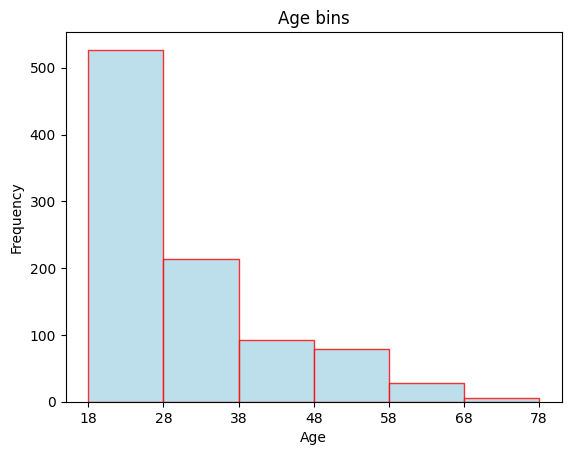

In [1642]:
#create intervale between min and max values of the "age" column
#bins = np.linspace(min(data["age"]), max(data["age"]), 10) #for float values
bins = np.arange(min(data["age"]), max(data["age"]) + 10, 10) #for integer values
plt.hist(data["age"], bins=bins, color = "lightblue", ec="red", alpha=0.8)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age bins")
plt.xticks(bins)
plt.show()

#create histogram of the "age" column
#data['age'].hist(bins=10)


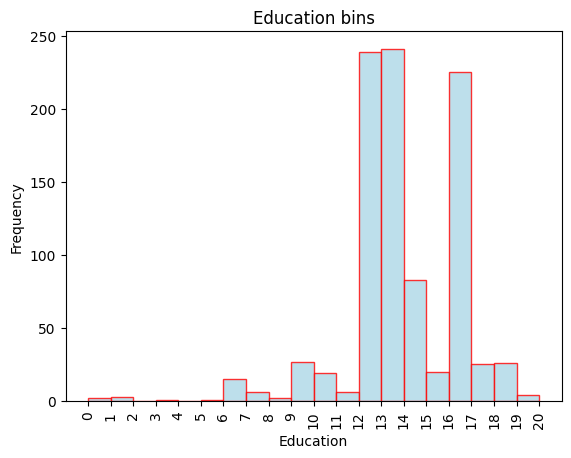

In [1643]:
#create intervale between min and max values of the "education" column
#bins = np.linspace(min(data["education"]), max(data["education"]), 20) #for float values

#create bins for education column between min and max values of the "education" column with a step of 1
bins = np.arange(min(data["education"]), max(data["education"]) + 1, 1) #for integer values
plt.hist(data["education"], bins=bins, color = "lightblue", ec="red", alpha=0.8)
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.title("Education bins")
plt.xticks(bins)
#change labels rotation
plt.xticks(rotation=90)
plt.show()


#create histogram of the "education" column
#data['education'].hist(bins=10)

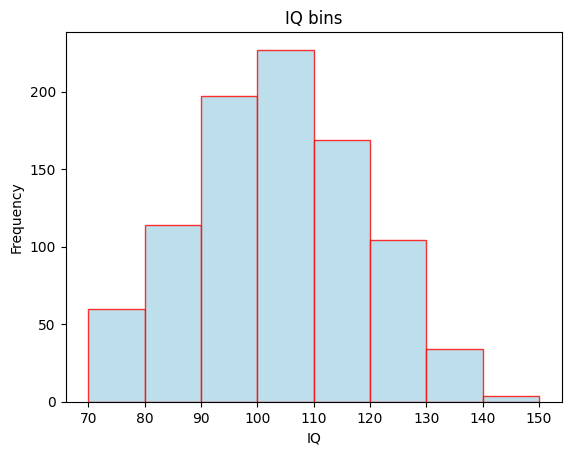

In [1644]:
#create intervale between min and max values of the "IQ" column
#bins = np.linspace(min(data["IQ"]), max(data["IQ"]), 10) #for float values
bins = [70, 80, 90, 100, 110, 120, 130, 140, 150] #for integer values
plt.hist(data["IQ"], bins=bins, color = "lightblue", ec="red", alpha=0.8)
plt.xlabel("IQ")
plt.ylabel("Frequency")
plt.title("IQ bins")
plt.xticks(bins)
plt.show()

#create histogram of the "IQ" column
#data['IQ'].hist(bins=10)

Una vez comprobada la eliminación de los datos atípicos del registro de datos, se realiza una matriz de correlación entre las columnas "age", "education" e "IQ". Considerando el nivel de significancia estándar (0.05) podemos notar que:

* La correlación entre edad y educación es estadísticamente significativa y presenta una relación débil y negativa.
* La correlación entre edad e IQ es estadísticamente significativa y muestra una relación muy débil y positiva.
* La correlación entre educación e IQ no es estadísticamente significativa, a pesar de una relación moderada y positiva.

Pearson correlation between age and education:  -0.16060125667416877
Significance level of Pearson correlation between age and education:  0.02579276364532224
----------------------------------------
Pearson correlation between age and IQ:  0.028309427200084916
Significance level of Pearson correlation between age and IQ:  0.0008014236683969077
----------------------------------------
Pearson correlation between education and IQ:  0.35837958196885256
Significance level of Pearson correlation between education and IQ:  0.1284359247721695


<Axes: >

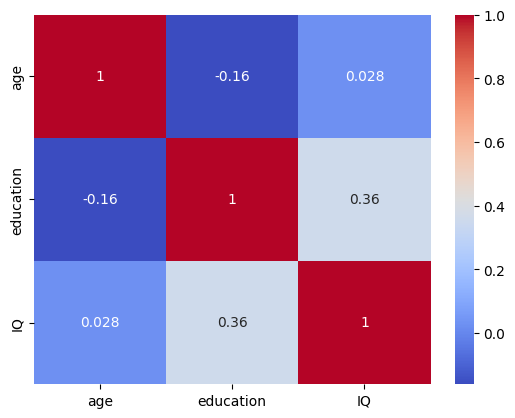

In [1645]:
#correlation matrix between age, education and IQ
corr = data[['age', 'education', 'IQ']].corr()

#print pearson correlation between age and education and the significance level
print('Pearson correlation between age and education: ', corr.loc['age', 'education'])
#print significance level of pearson correlation between age and education
print('Significance level of Pearson correlation between age and education: ', corr.loc['age', 'education']**2)

#print line division
print('----------------------------------------')

#print pearson correlation between age and IQ and the significance level
print('Pearson correlation between age and IQ: ', corr.loc['age', 'IQ'])
#print significance level of pearson correlation between age and IQ
print('Significance level of Pearson correlation between age and IQ: ', corr.loc['age', 'IQ']**2)

#print line division
print('----------------------------------------')

#print pearson correlation between education and IQ
print('Pearson correlation between education and IQ: ', corr.loc['education', 'IQ'])
#print significance level of pearson correlation between education and IQ
print('Significance level of Pearson correlation between education and IQ: ', corr.loc['education', 'IQ']**2)
#plot the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

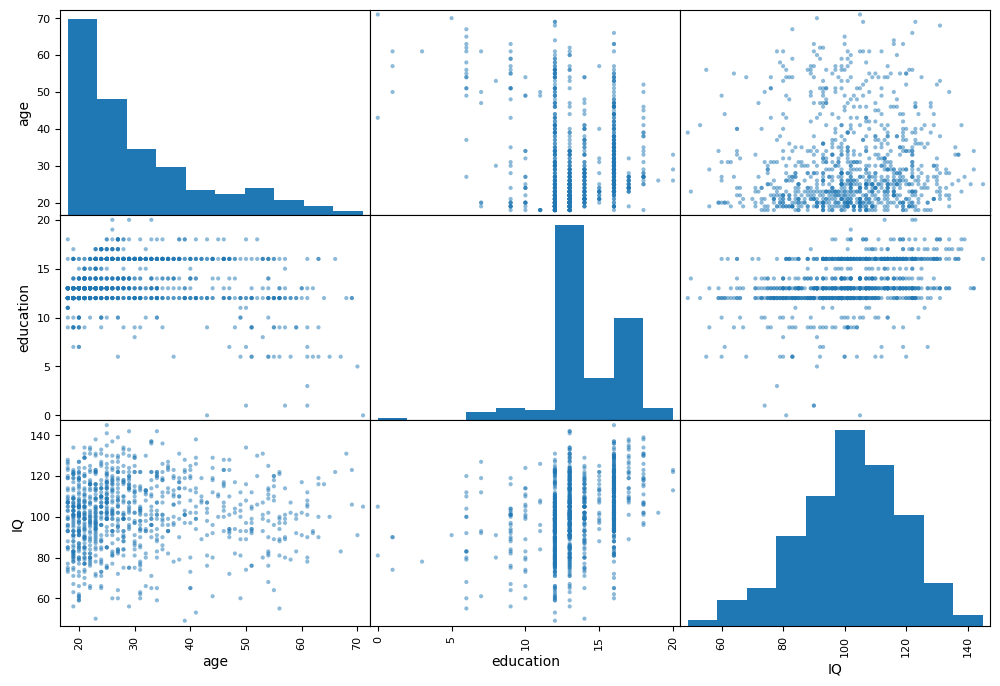

In [1646]:
#create a scatter matrix of the columns age, education and IQ
scatter_matrix(data[['age', 'education', 'IQ']], figsize=(12,8))

plt.show()

Posteriormente, se realiza un gráfico de barras con la finalidad de conocer la distribución de pacientes en "main.disorder" y "specific.disorder". Podemos notar que la columna "main.disorder" presenta los 6 trastornos categóricos grandes más la categoría de "Healthy control, lo cual es correcto. Sin embargo, "specific.disorder" presenta valores que no corresponden a su categoría.

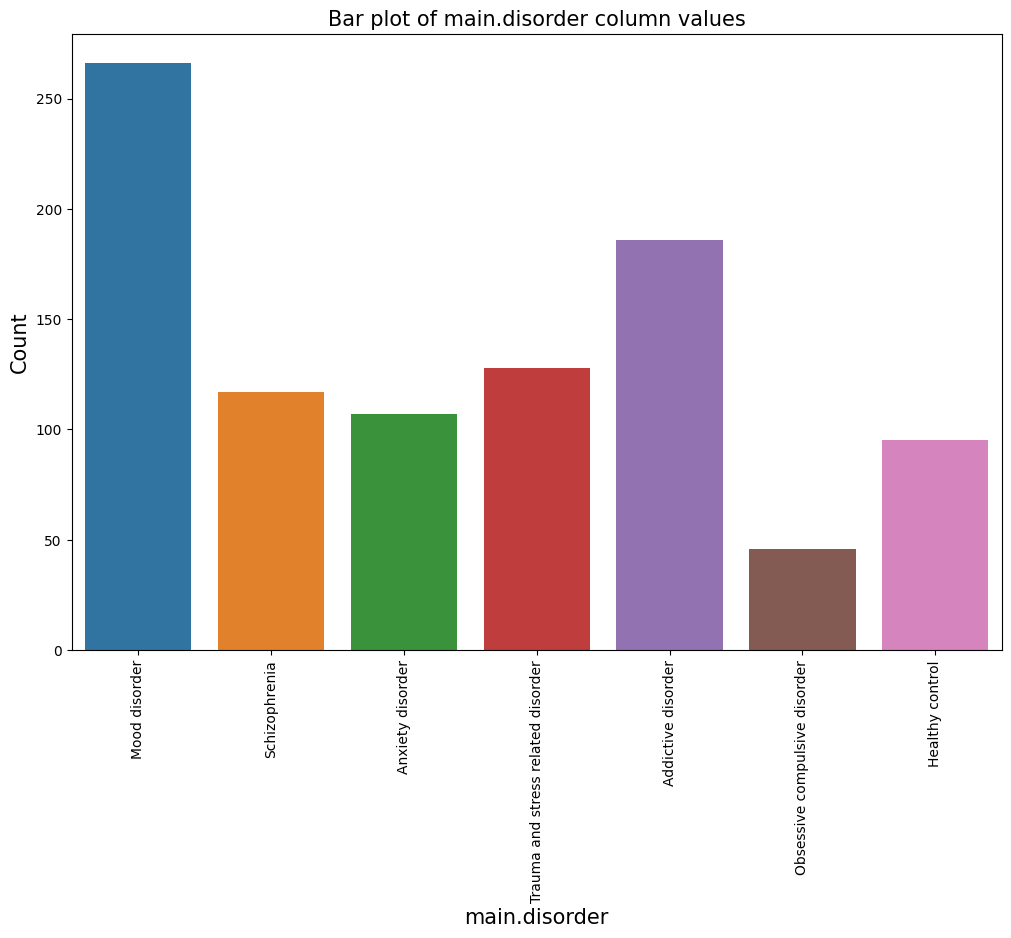

In [1647]:
#bar plot of main.disorder column values
plt.figure(figsize=(12,8))
sns.countplot(x='main.disorder', data=data)
plt.xlabel('main.disorder',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Bar plot of main.disorder column values',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


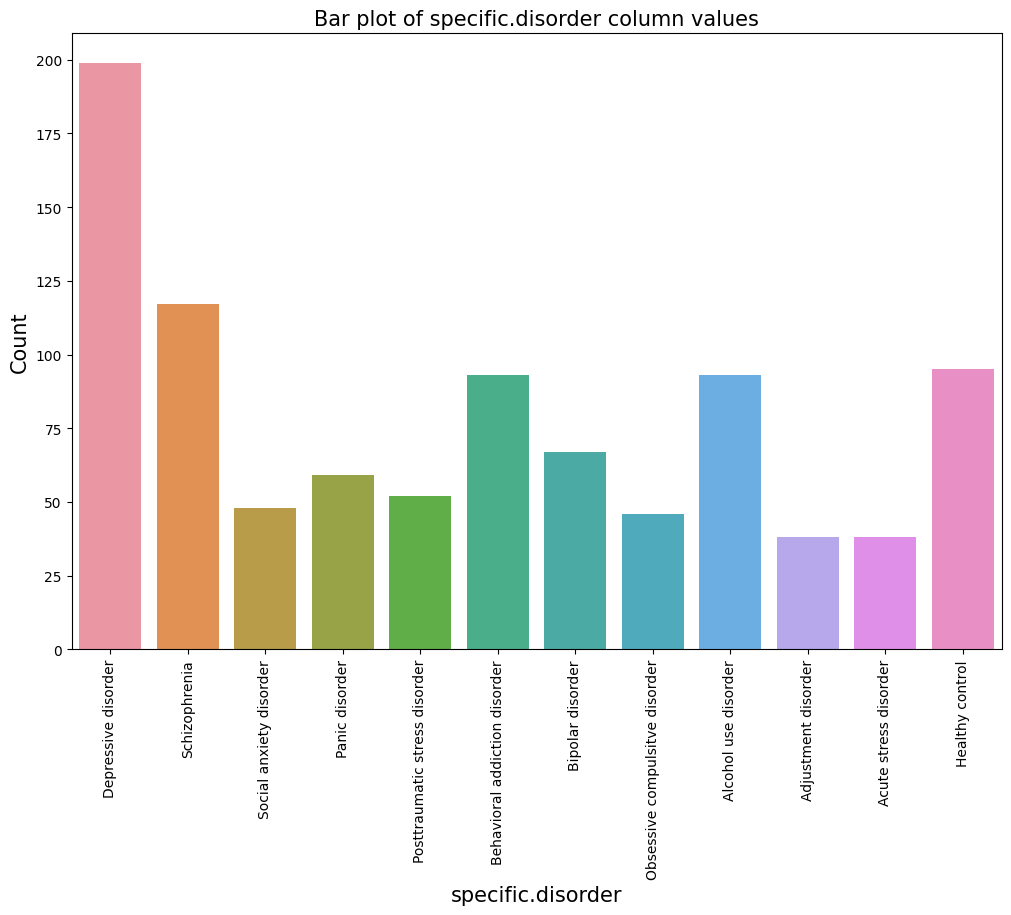

In [1648]:
#bar plot of specific.disorder column values
plt.figure(figsize=(12,8))
sns.countplot(x='specific.disorder', data=data)
plt.xlabel('specific.disorder',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Bar plot of specific.disorder column values',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Con el fin de limpiar la columna "specific.disorder", se decide remover las categorías pertenecientes a "main.disorder" del conjunto de datos. Finalmente se grafíca la distribución de los desordenes específicos encontrados en la muestra.

In [1649]:
#create a list with all values of "main.disorder" column
aux = data['main.disorder'].unique()
#change all values of "specific.disorder" column to "Not Found" when the value is in the list
data.loc[data['specific.disorder'].isin(aux), 'specific.disorder'] = 'Not Found'
#change all values of "specific.disorder" column to "Not Found" when the value is "Obsessive compulsitve disorder"
data.loc[data['specific.disorder'] == 'Obsessive compulsitve disorder', 'specific.disorder'] = 'Not Found'


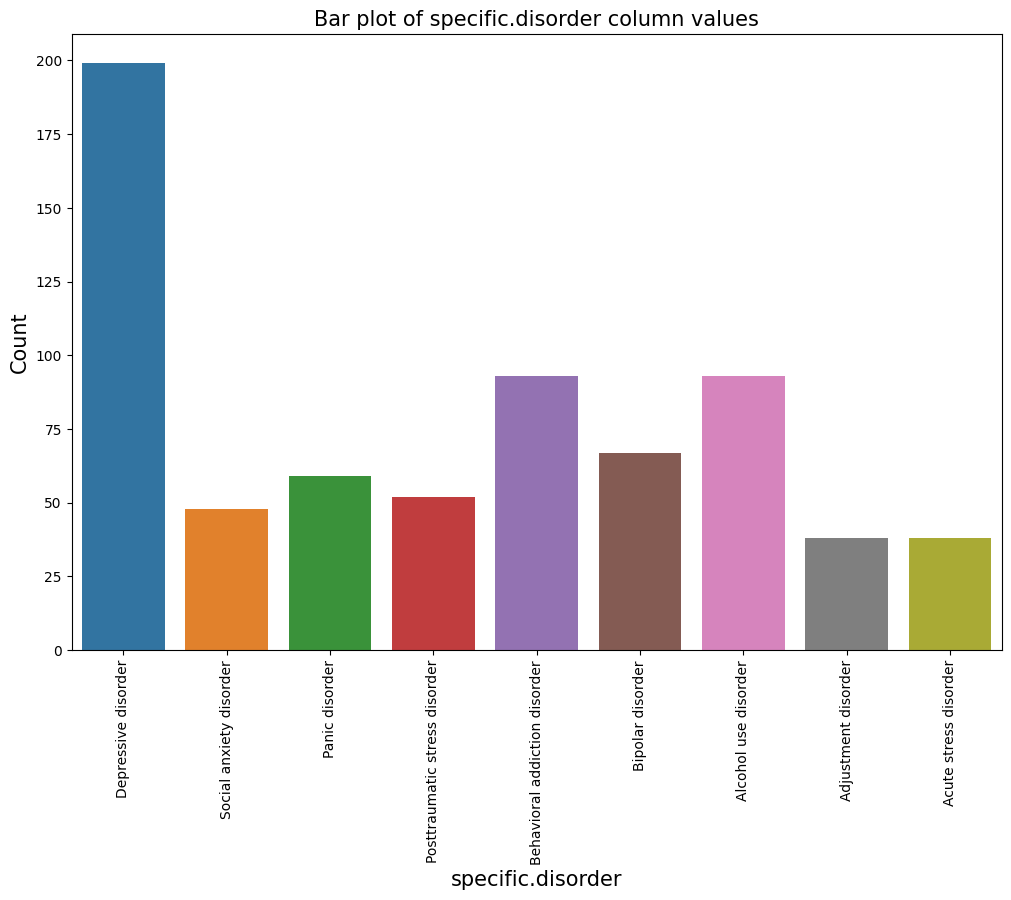

In [1650]:
#bar plot of specific.disorder column values, excluding "Not Found" values
plt.figure(figsize=(12,8))
sns.countplot(x='specific.disorder', data=data[data['specific.disorder'] != 'Not Found'])
plt.xlabel('specific.disorder',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Bar plot of specific.disorder column values',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

# Búsqueda de valores atípicos

Para el tratamiento de los datos atípicos se utilizaron 2 métodos que permiten remover los valores anómalos de la muestra: a) Local Outliner Factor (LOF) y b) Boxplots. Antes de realizar estos análisis, se decide eliminar las columnas sex, Date, age, education, IQ, main.disorder y specific.disorder ya que representan datos categóricos que no competen a los análisis a realizar.

In [1651]:
#remove the "sex", "Date", "age", "education" and "IQ, main.disorder, and specific.disorder" columns 
data.drop(['sex','Date', 'age', 'education', 'IQ','main.disorder','specific.disorder'], axis=1, inplace=True)
#show the first 5 rows of the dataset
data.head()

AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
Pacient_ID                                                        
1                  18.458634         45.735525        18.807200   
2                  24.920269         23.793912        17.702133   
3                  19.687536         21.053213        16.062682   
4                   8.269064         10.083543         8.517659   
5                   9.458099          9.434083        11.747245   

            AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  \
Pacient_ID                                                      
1                 27.986192        19.967111        17.050696   
2                 25.537991        28.481998        24.214343   
3                 17.960994        19.669073        20.735947   
4                 11.381722        12.124395        13.970262   
5                  9.673965        10.687329         9.736497   

            AB.A.delta.g.F8  AB.A.delta.h.T3  AB.A.delta.i.C3  \
Pacient_ID                                                      
1                 27.132109         8.285666        21.577700   
2                 17.419992        11.548480        23.221182   
3                 39.870280        18.926313        17.809656   
4                 15.297849         7.462400        14.903720   
5                  8.968907         6.272952         8.245680   

            AB.A.delta.j.Cz  ...  COH.F.gamma.o.Pz.p.P4  \
Pacient_ID                   ...                          
1                 25.383556  ...              70.794615   
2                 25.633690  ...              75.048447   
3                 19.513817  ...              91.104357   
4                 17.451897  ...              62.572653   
5                  9.821039  ...              66.172131   

            COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  \
Pacient_ID                                                 
1                       43.167518              54.750592   
2                       36.701346              40.122985   
3                       85.677061              88.763916   
4                       41.940265              34.265888   
5                       43.897108              42.087010   

            COH.F.gamma.o.Pz.s.O2  COH.F.gamma.p.P4.q.T6  \
Pacient_ID                                                 
1                       43.710438              69.821512   
2                       51.511086              40.950687   
3                       90.520212              94.218564   
4                       51.330723              63.553482   
5                       47.886919              57.812243   

            COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
Pacient_ID                                                 
1                       45.573861              57.805506   
2                       45.449571              63.396844   
3                       85.530729              96.995840   
4                       24.377419              59.216170   
5                       40.729197              56.101552   

            COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  \
Pacient_ID                                                 
1                       36.339977              71.326803   
2                       17.737763              29.802046   
3                       81.415802              95.386338   
4                       11.659469              62.701330   
5                       35.148619              58.023176   

            COH.F.gamma.r.O1.s.O2  
Pacient_ID                         
1                       51.463075  
2                       49.315534  
3                       88.653172  
4                       28.049332  
5                       52.661084  

[5 rows x 1140 columns]

Local Outliner Factor (LOF) permite detectar puntos anómalos mediante la densidad local observada con relación a sus vecinos. Una información más detallada se puede observar en https://www.geeksforgeeks.org/novelty-detection-with-local-outlier-factor-lof-in-scikit-learn/

In [1652]:
#create Local outlier factor model to detect outliers and remove them from the dataset, ignoring the "main.disorder" and "specific.disorder" columns
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
#fit the model
yhat = lof.fit_predict(data)
#select all rows that are not outliers
mask = yhat != -1
#remove outliers from the dataset
data = data[mask]
#show the first 5 rows of the dataset
data.head()

AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
Pacient_ID                                                        
1                  18.458634         45.735525        18.807200   
3                  19.687536         21.053213        16.062682   
4                   8.269064         10.083543         8.517659   
5                   9.458099          9.434083        11.747245   
6                  12.378931         10.587649        13.999293   

            AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  \
Pacient_ID                                                      
1                 27.986192        19.967111        17.050696   
3                 17.960994        19.669073        20.735947   
4                 11.381722        12.124395        13.970262   
5                  9.673965        10.687329         9.736497   
6                 14.649530        10.691815        10.050466   

            AB.A.delta.g.F8  AB.A.delta.h.T3  AB.A.delta.i.C3  \
Pacient_ID                                                      
1                 27.132109         8.285666        21.577700   
3                 39.870280        18.926313        17.809656   
4                 15.297849         7.462400        14.903720   
5                  8.968907         6.272952         8.245680   
6                  7.537139        10.104225        12.737258   

            AB.A.delta.j.Cz  ...  COH.F.gamma.o.Pz.p.P4  \
Pacient_ID                   ...                          
1                 25.383556  ...              70.794615   
3                 19.513817  ...              91.104357   
4                 17.451897  ...              62.572653   
5                  9.821039  ...              66.172131   
6                 12.521160  ...              73.204681   

            COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  \
Pacient_ID                                                 
1                       43.167518              54.750592   
3                       85.677061              88.763916   
4                       41.940265              34.265888   
5                       43.897108              42.087010   
6                       48.003451              35.878375   

            COH.F.gamma.o.Pz.s.O2  COH.F.gamma.p.P4.q.T6  \
Pacient_ID                                                 
1                       43.710438              69.821512   
3                       90.520212              94.218564   
4                       51.330723              63.553482   
5                       47.886919              57.812243   
6                       44.399510              73.375229   

            COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
Pacient_ID                                                 
1                       45.573861              57.805506   
3                       85.530729              96.995840   
4                       24.377419              59.216170   
5                       40.729197              56.101552   
6                       30.725395              55.030215   

            COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  \
Pacient_ID                                                 
1                       36.339977              71.326803   
3                       81.415802              95.386338   
4                       11.659469              62.701330   
5                       35.148619              58.023176   
6                       34.083908              72.188735   

            COH.F.gamma.r.O1.s.O2  
Pacient_ID                         
1                       51.463075  
3                       88.653172  
4                       28.049332  
5                       52.661084  
6                       57.075739  

[5 rows x 1140 columns]

El uso de boxplot nos permite conocer valores atípicos en un conjunto de datos, este gráfico pérmite conocer la distribución de una variable basado en 5 medidas (mínimo, primer cuartil, mediana, tercer cuartil y máximo), todos los valores que estén más de 1.5 veces alejados del IQR más cercano, son considerados valores atípicos. Una explicación más detallada de como funcionan estos gráficos puede ser encontrada en https://www.geeksforgeeks.org/box-plot/. 

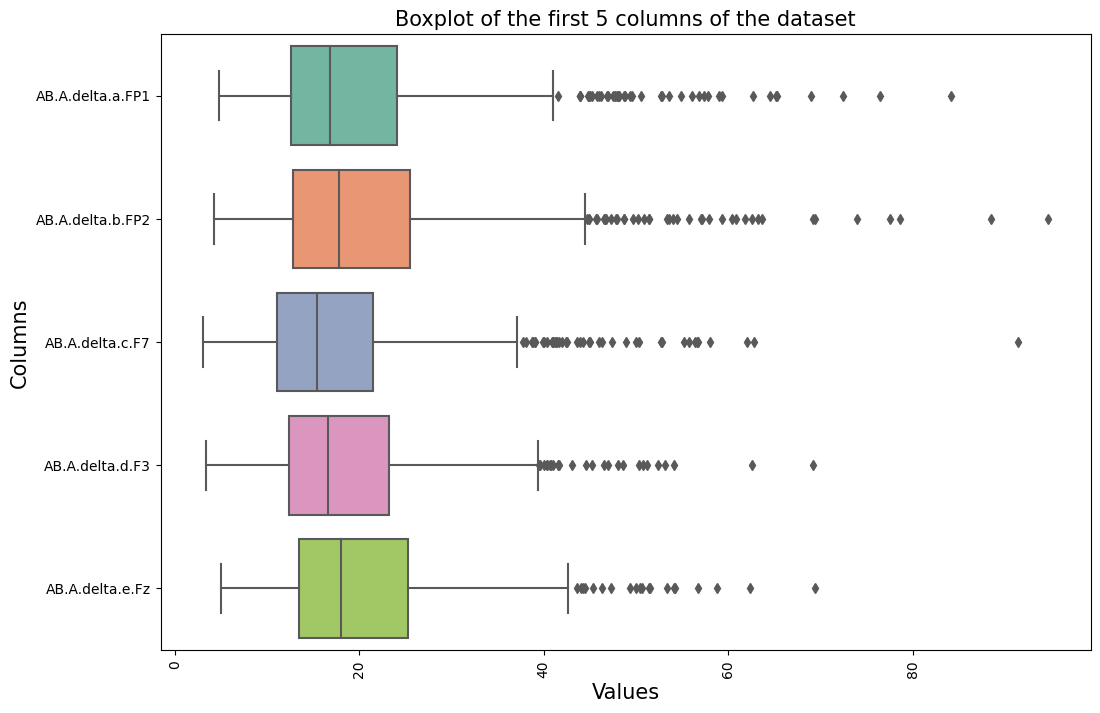

In [1653]:
#plot boxplot of the first 5 columns of the dataset to detect outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=data.iloc[:,0:5], orient="h", palette="Set2")
plt.xlabel('Values',fontsize=15)
plt.ylabel('Columns',fontsize=15)
plt.title('Boxplot of the first 5 columns of the dataset',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()



Para el tratamiento de datos se decide eliminar aquellos valores atípicos que se encuentren más allá de 1.5 veces el IQR, como valor de referencia se decide seleccionar la columna "AB.A.delta.a.FP1". Para más información, visite https://absentdata.com/python/how-to-find-outliers-in-python/

In [1654]:
#treatinng of outliers
#calculate the mean of each column
means = data.mean(axis=0)
#calculate the standard deviation of each column
stds = data.std(axis=0)
#calculate the z-score of each value of the dataset
z = (data - means) / stds
#select all rows that have z-score less than 3
mask = z.abs().lt(3).all(axis=1)
#remove outliers from the dataset
data = data[mask]
#show the first 5 rows of the dataset
data.head()


AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
Pacient_ID                                                        
9                  14.445573         14.719121        11.553745   
13                 14.425770         15.632648         9.573189   
16                 13.313970         13.812141        17.179693   
18                 24.619149         29.933954        12.565844   
19                 12.735172         16.135740        23.606439   

            AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  \
Pacient_ID                                                      
9                 12.340098        14.147253        13.053499   
13                14.254269        17.339421        16.150587   
16                14.019812        14.969463        15.027232   
18                21.774821        30.886449        27.451878   
19                 9.448904        11.245987        15.693744   

            AB.A.delta.g.F8  AB.A.delta.h.T3  AB.A.delta.i.C3  \
Pacient_ID                                                      
9                 11.820355         9.897625        11.522320   
13                11.064571         6.588239        12.041985   
16                13.920850        10.341160        21.001440   
18                22.510103         7.972263        19.575556   
19                 7.645827        11.227030         7.975021   

            AB.A.delta.j.Cz  ...  COH.F.gamma.o.Pz.p.P4  \
Pacient_ID                   ...                          
9                 12.260612  ...              71.478777   
13                16.641625  ...              80.229813   
16                14.462466  ...              70.288459   
18                27.168932  ...              78.082019   
19                10.083723  ...              81.337259   

            COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  \
Pacient_ID                                                 
9                       43.181511              46.943025   
13                      52.413665              67.245402   
16                      57.750765              64.595846   
18                      46.175105              51.264868   
19                      55.544655              29.078539   

            COH.F.gamma.o.Pz.s.O2  COH.F.gamma.p.P4.q.T6  \
Pacient_ID                                                 
9                       48.939177              55.395833   
13                      65.959203              79.615017   
16                      64.954548              66.568194   
18                      64.139290              72.430229   
19                      30.681815              73.822211   

            COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
Pacient_ID                                                 
9                       39.726157              53.143122   
13                      62.081839              89.384902   
16                      53.078622              65.497703   
18                      31.635623              70.893672   
19                      23.869524              35.227327   

            COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  \
Pacient_ID                                                 
9                       37.431537              53.336497   
13                      45.645581              87.043711   
16                      50.461381              66.115482   
18                      19.579475              68.927555   
19                      18.038411              29.836026   

            COH.F.gamma.r.O1.s.O2  
Pacient_ID                         
9                       48.811193  
13                      60.742344  
16                      66.080758  
18                      48.112926  
19                      12.320825  

[5 rows x 1140 columns]

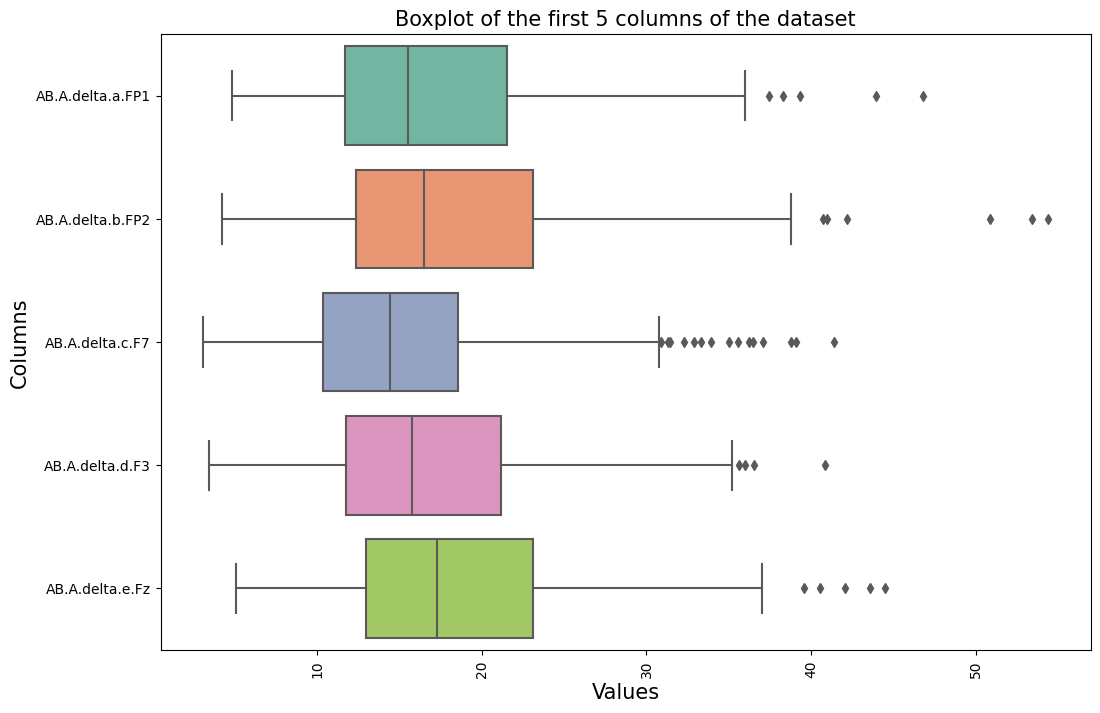

In [1655]:
#plot boxplot of the first 5 columns of the dataset to detect outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=data.iloc[:,0:5], orient="h", palette="Set2")
plt.xlabel('Values',fontsize=15)
plt.ylabel('Columns',fontsize=15)
plt.title('Boxplot of the first 5 columns of the dataset',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Una vez verificada la limpieza de los datos, se realiza un preprocesamiento de los datos categoricos con la finalidad de poder construir mapas de calor de las relaciones entre columnas.

# Preprocesamiento de mapas de calor

Uno de los requisitos para realizar mapas de calor es que las variables comparables sean de tipo numérico. En este sentido, se realiza una verificación para determinar si existen variables de tipo categórico en los datos. Como anteriormente se eliminaron estas columnas, no hay que realizar ninguna conversión, sin embargo, de ser necesaria una conversión de datos categóricos a numéricos, se puede utilizar el paquete Label Encoder, una información más detallada se puede encontrar en https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/. También es posible utilizar el método One Hot Encoding para este proceso, una información más detallada se puede ver en https://interactivechaos.com/es/manual/tutorial-de-machine-learning/one-hot-encoding . Una vez finalizada esta conversión, se procede a graficar los mapas de calor.

In [1656]:
#verify if type of each column is float
data.dtypes

AB.A.delta.a.FP1         float64
AB.A.delta.b.FP2         float64
AB.A.delta.c.F7          float64
AB.A.delta.d.F3          float64
AB.A.delta.e.Fz          float64
                          ...   
COH.F.gamma.p.P4.r.O1    float64
COH.F.gamma.p.P4.s.O2    float64
COH.F.gamma.q.T6.r.O1    float64
COH.F.gamma.q.T6.s.O2    float64
COH.F.gamma.r.O1.s.O2    float64
Length: 1140, dtype: object

In [1657]:
#print object data type columns
data.select_dtypes(include=['object']).columns

Index([], dtype='object')

# Mapas de Calor

La siguiente sección explica la detección de los 2 grupos importantes encontrados en el dataset, estos son el grupo "AB" y "COH", así como las relaciones encontradas en los subtipos "alpha", "beta", "gamma", "delta"y "theta".

## Exploración Inicial

Como exploración inicial, se revisan las primeras 100 filas del conjunto de datos.

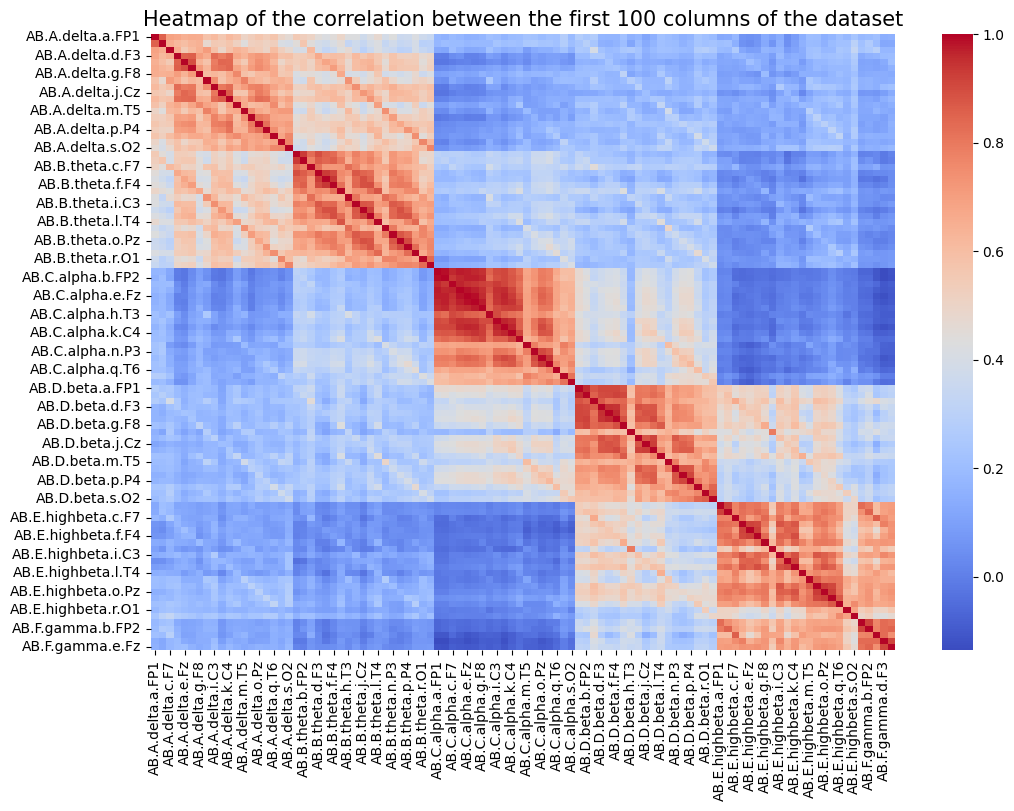

In [1658]:
#create a heatmap of the correlation between the first 100 columns of the dataset
plt.figure(figsize=(12,8))
sns.heatmap(data.iloc[:,0:100].corr(), cmap='coolwarm')
plt.title('Heatmap of the correlation between the first 100 columns of the dataset',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


Podemos notar la existencia de agrupaciones dentro del conjunto de datos, sin embargo, el espacio observado es pequeño en comparación a la totalidad de la muestra, se decide revisar 100 espacios más.

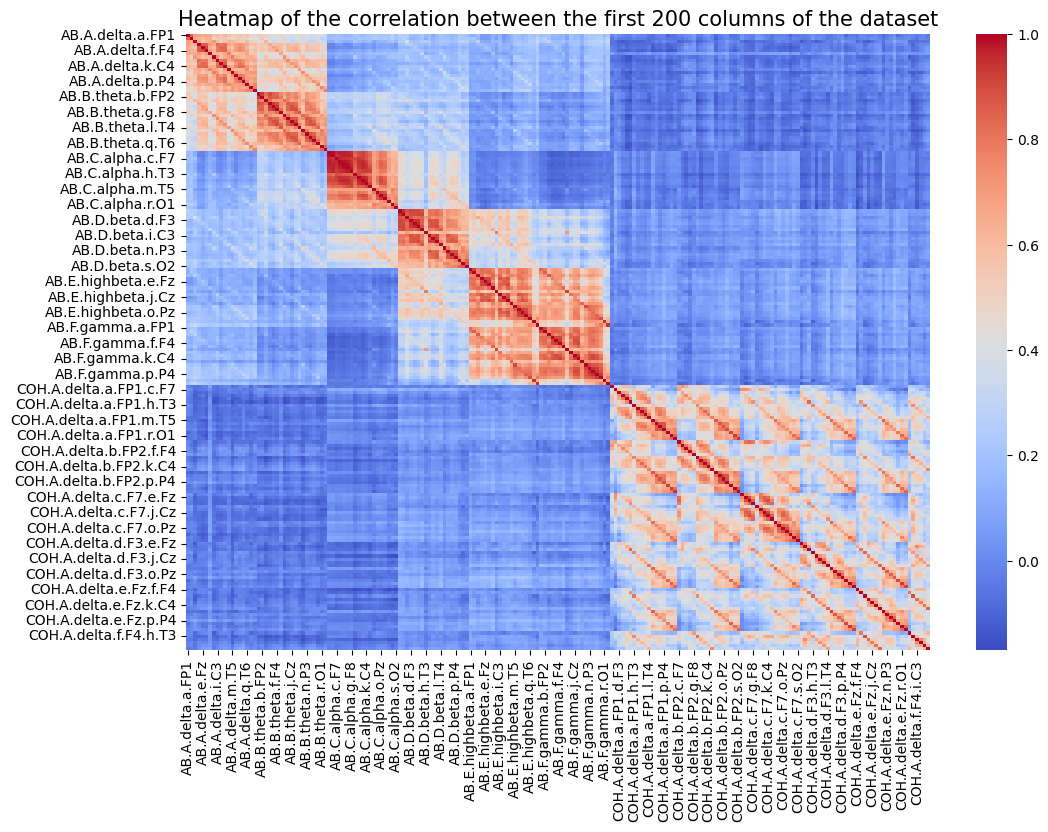

In [1659]:
#create a heatmap of the correlation between the first 200 columns of the dataset
plt.figure(figsize=(12,8))
sns.heatmap(data.iloc[:,0:200].corr(), cmap='coolwarm')
plt.title('Heatmap of the correlation between the first 200 columns of the dataset',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Luego de analizar los 200 datos, podemos notar la existencia de 2 agrupaciones importantes, "AB" y "COH". Teniendo en cuenta esto, se supone la existencia de un patrón en las variables analizadas, por lo tanto, se procede a aumentar el espacio de búsqueda a 300 columnas.

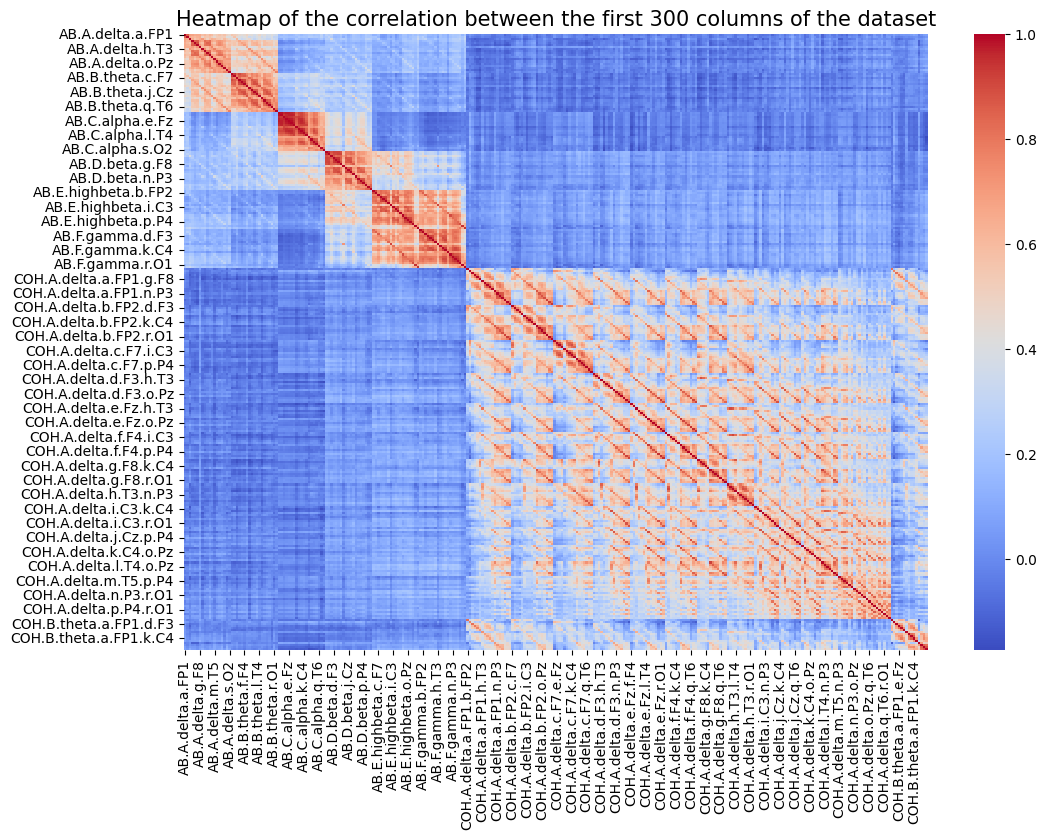

In [1660]:
#create a heatmap of the correlation between the first 300 columns of the dataset
plt.figure(figsize=(12,8))
sns.heatmap(data.iloc[:,0:300].corr(), cmap='coolwarm')
plt.title('Heatmap of the correlation between the first 300 columns of the dataset',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Al no encontrar un tercer grupo, se decide realizar una revisión de los diferentes grupos existentes en las columnas del dataset, para ello, se agrupan los datos por las primeras 3 letras de columna.

In [1661]:
#group all columns by the first 3 letters of their names, then print groups length
len(data.groupby(data.columns.str[:3], axis=1).groups)

2

Del análisis se pudo identificar la presencia de 9 grupos, con la finalidad de conocer cada uno, se imprimen los datos de cada grupo.

In [1662]:
#identify the groups
data.groupby(data.columns.str[:3], axis=1).groups


{'AB.': ['AB.A.delta.a.FP1', 'AB.A.delta.b.FP2', 'AB.A.delta.c.F7', 'AB.A.delta.d.F3', 'AB.A.delta.e.Fz', 'AB.A.delta.f.F4', 'AB.A.delta.g.F8', 'AB.A.delta.h.T3', 'AB.A.delta.i.C3', 'AB.A.delta.j.Cz', 'AB.A.delta.k.C4', 'AB.A.delta.l.T4', 'AB.A.delta.m.T5', 'AB.A.delta.n.P3', 'AB.A.delta.o.Pz', 'AB.A.delta.p.P4', 'AB.A.delta.q.T6', 'AB.A.delta.r.O1', 'AB.A.delta.s.O2', 'AB.B.theta.a.FP1', 'AB.B.theta.b.FP2', 'AB.B.theta.c.F7', 'AB.B.theta.d.F3', 'AB.B.theta.e.Fz', 'AB.B.theta.f.F4', 'AB.B.theta.g.F8', 'AB.B.theta.h.T3', 'AB.B.theta.i.C3', 'AB.B.theta.j.Cz', 'AB.B.theta.k.C4', 'AB.B.theta.l.T4', 'AB.B.theta.m.T5', 'AB.B.theta.n.P3', 'AB.B.theta.o.Pz', 'AB.B.theta.p.P4', 'AB.B.theta.q.T6', 'AB.B.theta.r.O1', 'AB.B.theta.s.O2', 'AB.C.alpha.a.FP1', 'AB.C.alpha.b.FP2', 'AB.C.alpha.c.F7', 'AB.C.alpha.d.F3', 'AB.C.alpha.e.Fz', 'AB.C.alpha.f.F4', 'AB.C.alpha.g.F8', 'AB.C.alpha.h.T3', 'AB.C.alpha.i.C3', 'AB.C.alpha.j.Cz', 'AB.C.alpha.k.C4', 'AB.C.alpha.l.T4', 'AB.C.alpha.m.T5', 'AB.C.alpha.n.P3

Finalmente se pudo notar la presencia de 2 conjuntos claves dentro del dataset, el grupo "AB" y el grupo "COH", además se pudo notar que las señales se encuentran separadas en 5 subtipos, las cuales son "alpha","beta", "gamma", "delta" y "theta". Con esta información, se procede a realizar los mapas de calor por subtipos.

## Grupo AB

In [1663]:
#print number of columns that have AB in their names
len(data.filter(regex='AB').columns)


114

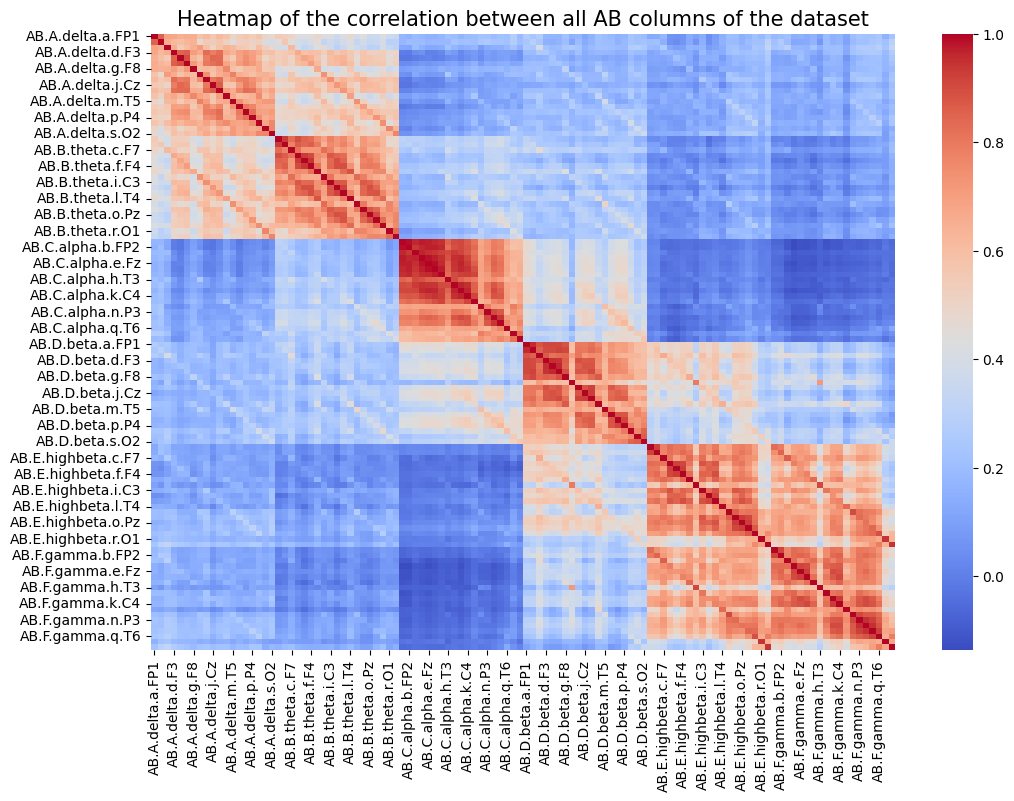

In [1664]:
#create a heatmap of the correlation between all AB columns of the dataset
plt.figure(figsize=(12,8))
sns.heatmap(data.filter(regex='AB').corr(), cmap='coolwarm')
plt.title('Heatmap of the correlation between all AB columns of the dataset',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


Con la finalidad de analizar el comportamiento de cada subtipo del dataset dentro del grupo AB se copiaron en una nueva variable todas las columnas del grupo AB. Posteriormente se revisó su comportamiento por cada subtipo.

In [1665]:
#create a dataframe with each column whit AB in their names
data_AB = data.filter(regex='AB')

### Subtipo Alpha

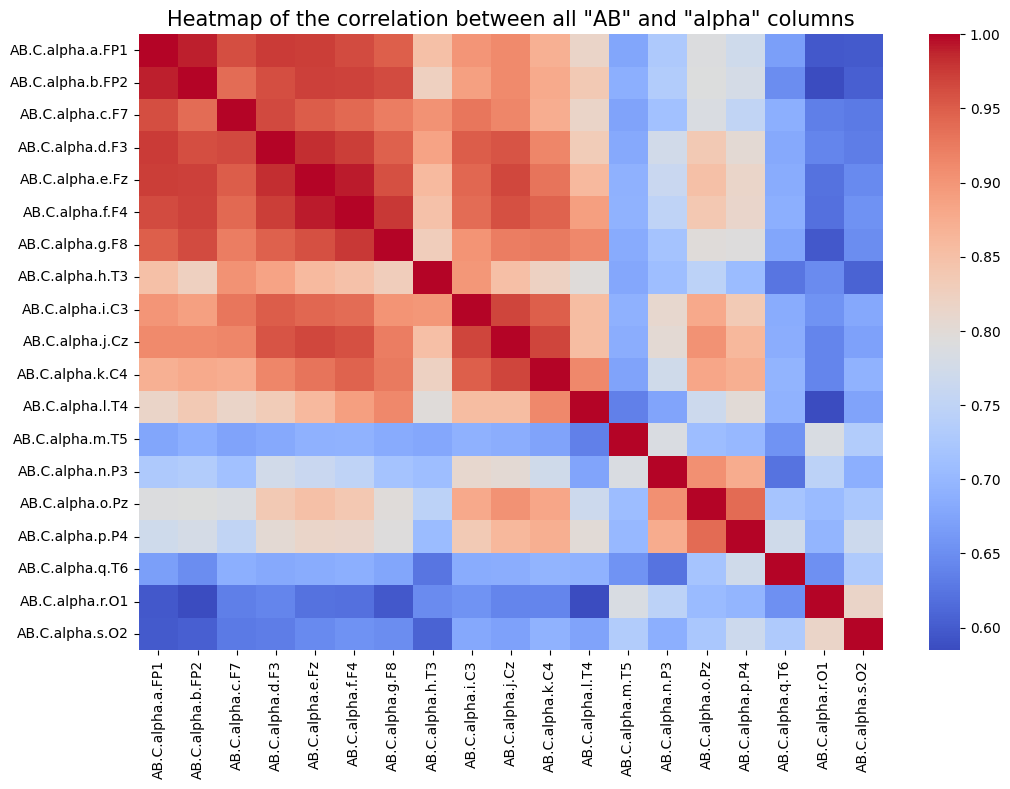

In [1666]:
#heatmap of the correlation between all "AB" columns and "alpha" columns of the dataset
plt.figure(figsize=(12,8))
sns.heatmap(data_AB.filter(regex='alpha').corr(), cmap='coolwarm')
plt.title('Heatmap of the correlation between all "AB" and "alpha" columns',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


### Subtipo Beta

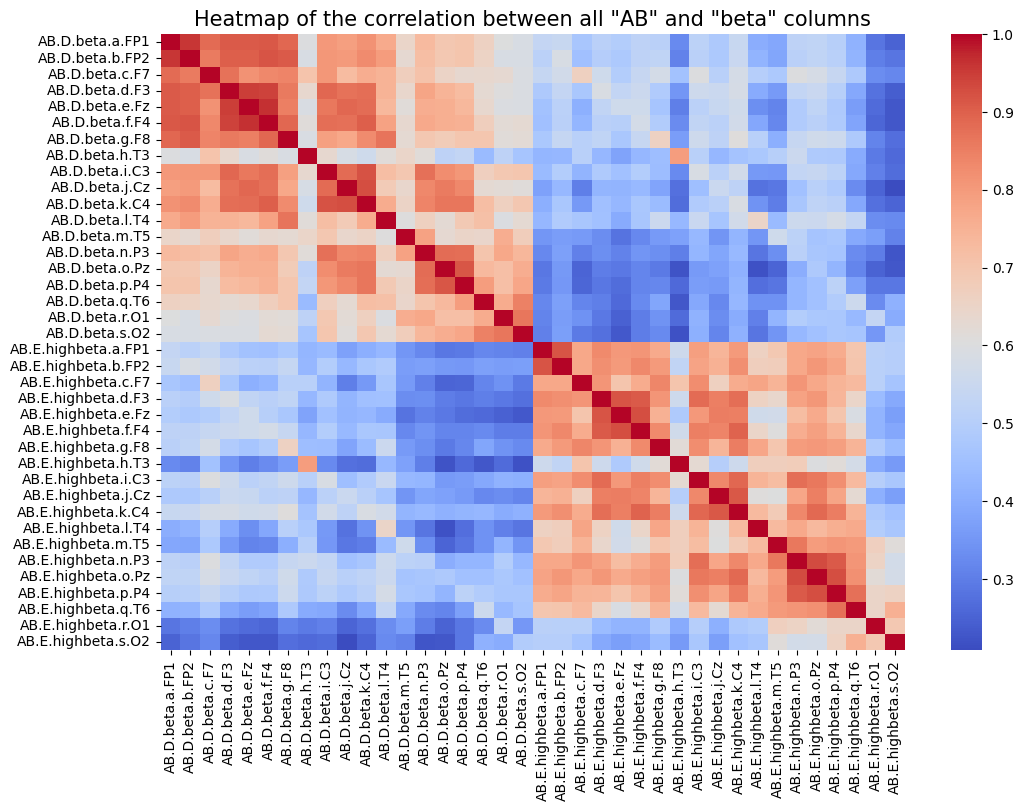

In [1667]:
#heatmap of the correlation between all "AB" columns and "beta" columns of the dataset
plt.figure(figsize=(12,8))
sns.heatmap(data_AB.filter(regex='beta').corr(), cmap='coolwarm')
plt.title('Heatmap of the correlation between all "AB" and "beta" columns',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

### Subtipo Gamma

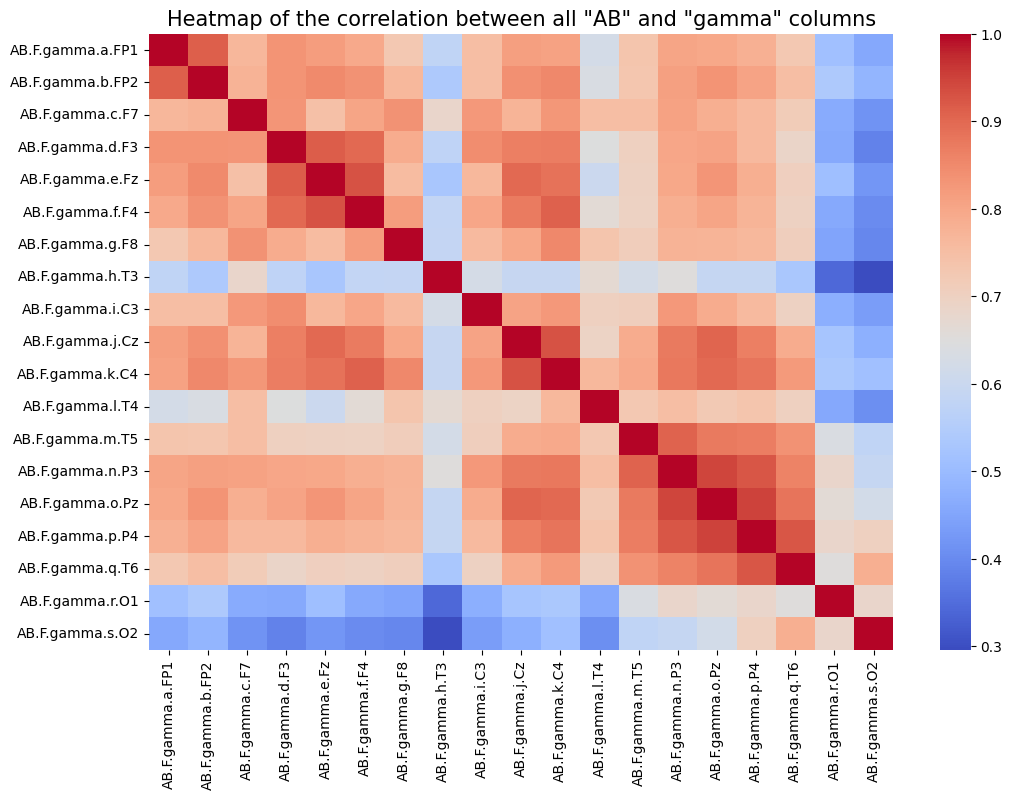

In [1668]:
#heatmap of the correlation between all "AB" columns and "gamma"  of the dataset
plt.figure(figsize=(12,8))
sns.heatmap(data_AB.filter(regex='gamma').corr(), cmap='coolwarm')
plt.title('Heatmap of the correlation between all "AB" and "gamma" columns',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

### Subtipo Delta

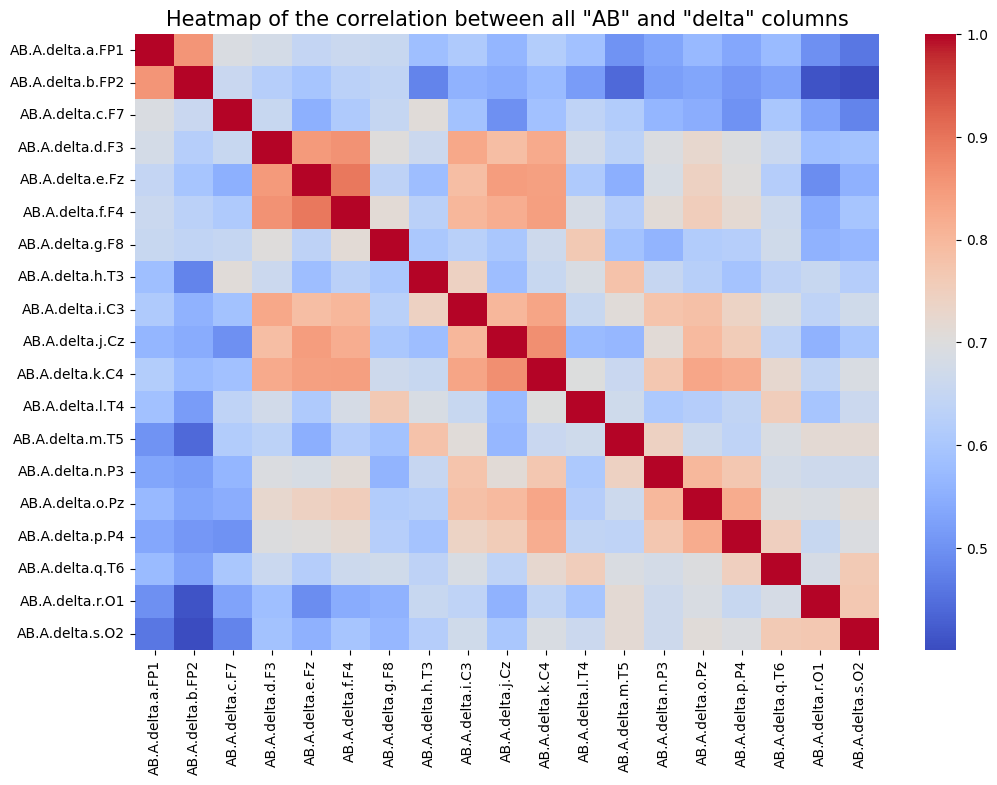

In [1669]:
#heatmap of the correlation between all "AB" columns and "delta" of the dataset
plt.figure(figsize=(12,8))
sns.heatmap(data_AB.filter(regex='delta').corr(), cmap='coolwarm')
plt.title('Heatmap of the correlation between all "AB" and "delta" columns',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

### Subtipo Theta

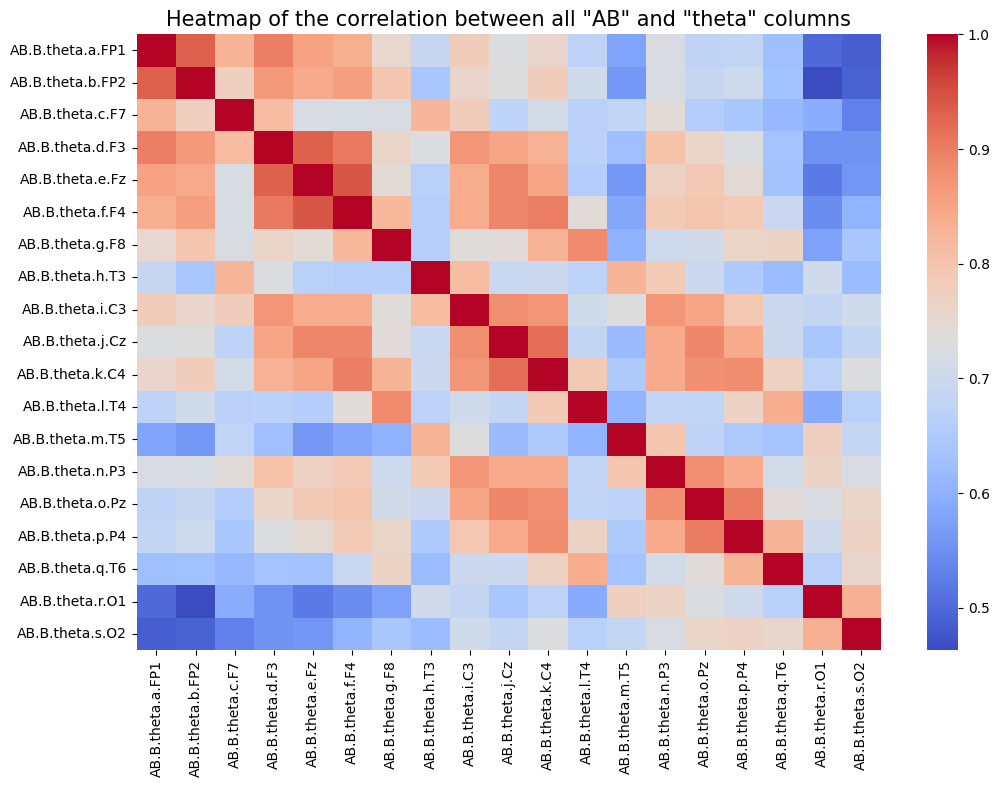

In [1670]:
#heatmap of the correlation between all "AB" columns and "theta" of the dataset
plt.figure(figsize=(12,8))
sns.heatmap(data_AB.filter(regex='theta').corr(), cmap='coolwarm')
plt.title('Heatmap of the correlation between all "AB" and "theta" columns',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

### Regresiones

Dado el supuesto que existe una relación positiva entre las variables, se puede realizar un análisis de regresión lineal para verificar la relación entre las columnas. Dada la extensión del dataset, solamente se realiza este proceso para las columnas "AB.A.delta.a.FP1" y "AB.A.delta.a.FP2", sin embargo, es extensible para cualquier relación entre las columnas. 

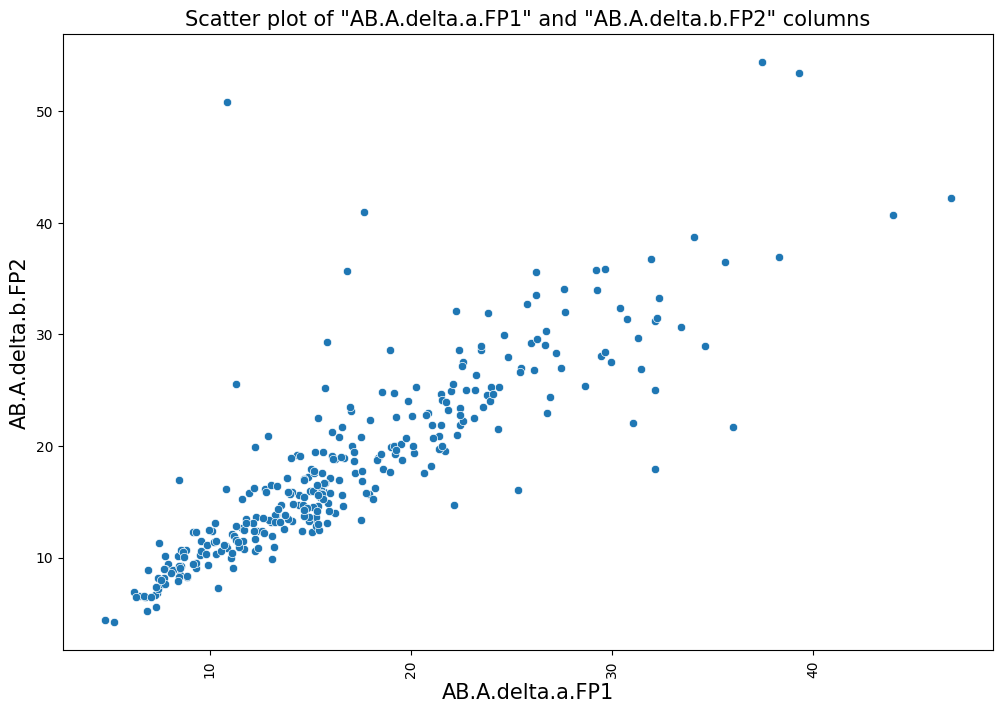

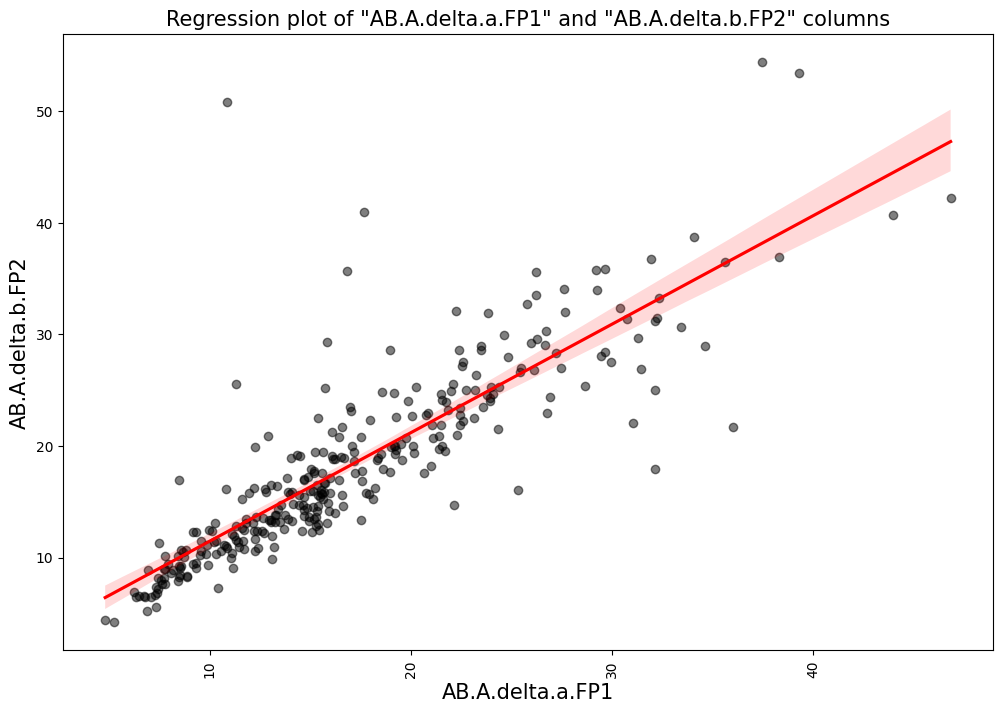

In [1671]:
#scatter plot of "AB.A.delta.a.FP1" and "AB.A.delta.a.FP2" columns
plt.figure(figsize=(12,8))
sns.scatterplot(x='AB.A.delta.a.FP1', y='AB.A.delta.b.FP2', data=data)
plt.xlabel('AB.A.delta.a.FP1',fontsize=15)
plt.ylabel('AB.A.delta.b.FP2',fontsize=15)
plt.title('Scatter plot of "AB.A.delta.a.FP1" and "AB.A.delta.b.FP2" columns',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

#print regression plot of "AB.A.delta.a.FP1" and "AB.A.delta.b.FP2" columns
plt.figure(figsize=(12,8))
sns.regplot(x='AB.A.delta.a.FP1', y='AB.A.delta.b.FP2', data=data, scatter_kws = {"color": "black", "alpha": 0.5}, line_kws = {"color": "red"})
plt.xlabel('AB.A.delta.a.FP1',fontsize=15)
plt.ylabel('AB.A.delta.b.FP2',fontsize=15)
plt.title('Regression plot of "AB.A.delta.a.FP1" and "AB.A.delta.b.FP2" columns',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


## Grupo COH

In [1672]:
#print all columns that contain "COH" in their names
len(data.filter(regex='COH').columns)


1026

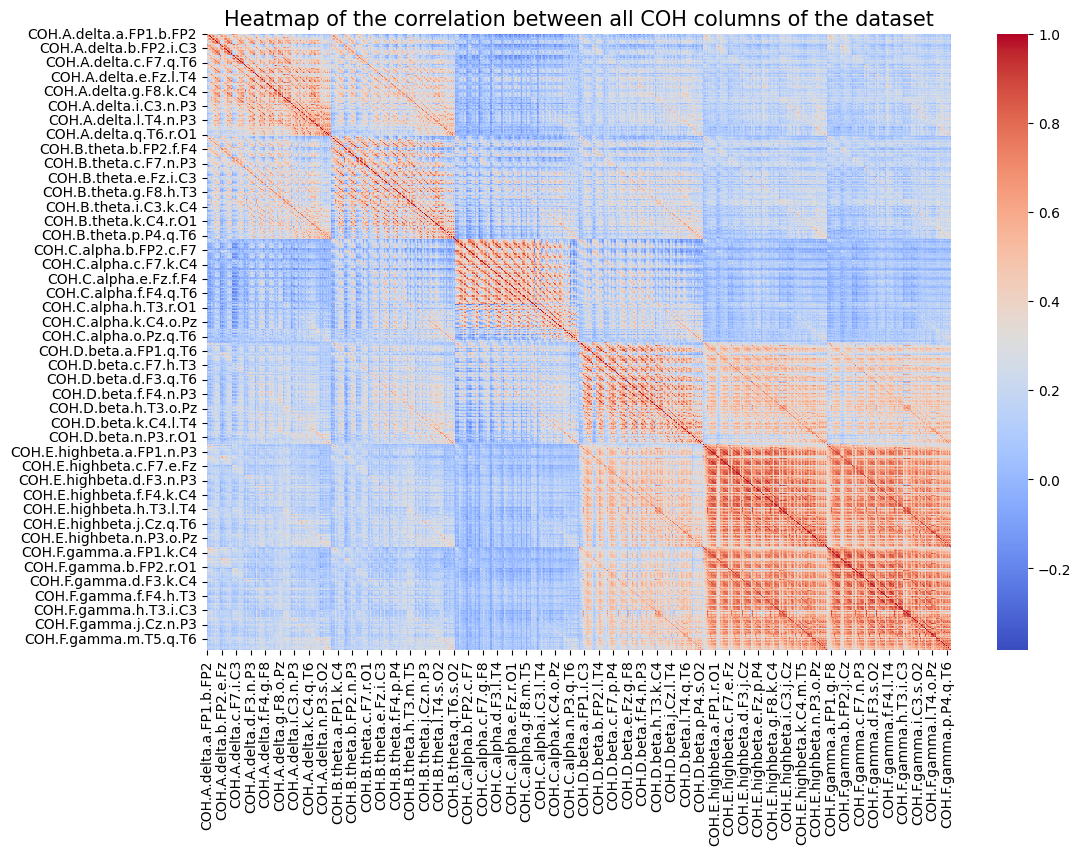

In [1673]:
#create a heatmap of the correlation between all COH columns of the dataset
plt.figure(figsize=(12,8))
sns.heatmap(data.filter(regex='COH').corr(), cmap='coolwarm')
plt.title('Heatmap of the correlation between all COH columns of the dataset',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Con la finalidad de analizar el comportamiento de cada subtipo del dataset dentro del grupo AB se copiaron en una nueva variable todas las columnas del grupo AB. Posteriormente se revisó su comportamiento por cada subtipo.

In [1674]:
#create a dataframe with each column whit COH in their names
data_COH = data.filter(regex='COH')

### Subtipo Alpha

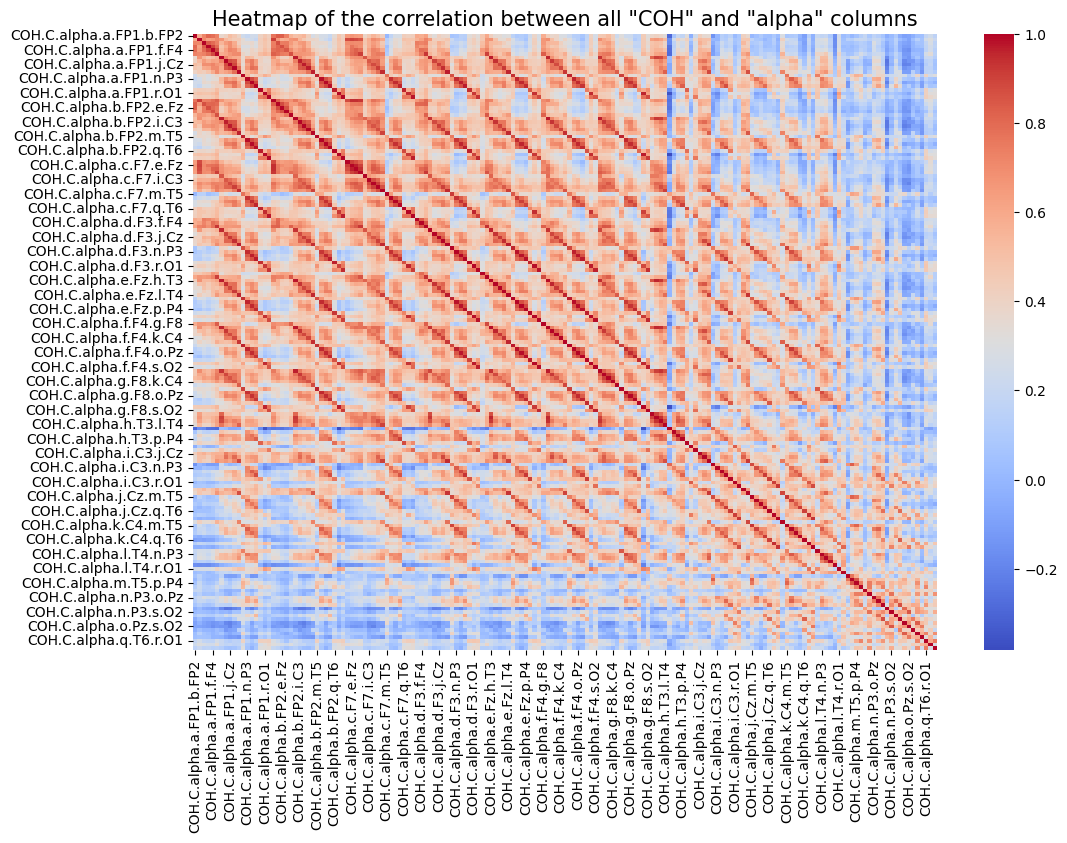

In [1675]:
#heatmap of the correlation between all "COH" columns and "alpha" columns of the dataset
plt.figure(figsize=(12,8))
sns.heatmap(data_COH.filter(regex='alpha').corr(), cmap='coolwarm')
plt.title('Heatmap of the correlation between all "COH" and "alpha" columns',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

### Subtipo Beta

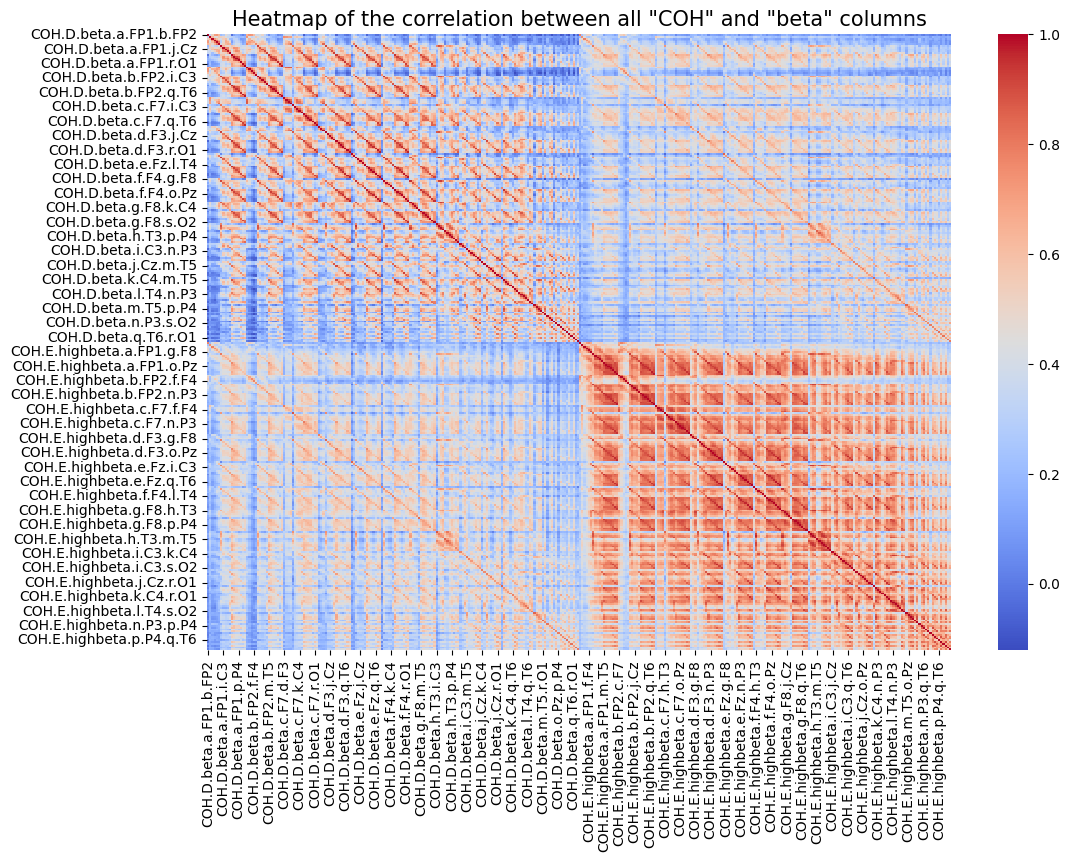

In [1676]:
#heatmap of the correlation between all "COH" columns and "beta" columns of the dataset
plt.figure(figsize=(12,8))
sns.heatmap(data_COH.filter(regex='beta').corr(), cmap='coolwarm')
plt.title('Heatmap of the correlation between all "COH" and "beta" columns',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

### Subtipo Gamma

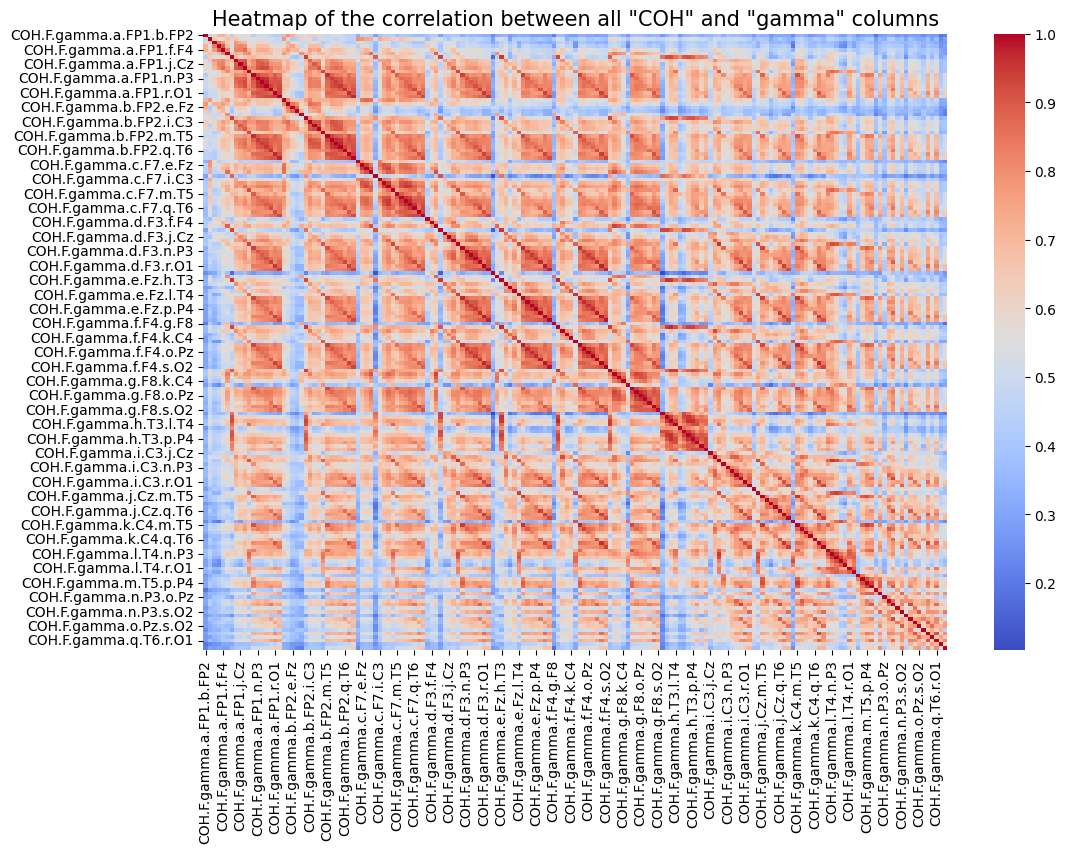

In [1677]:
#heatmap of the correlation between all "COH" columns and "gamma" columns of the dataset
plt.figure(figsize=(12,8))
sns.heatmap(data_COH.filter(regex='gamma').corr(), cmap='coolwarm')
plt.title('Heatmap of the correlation between all "COH" and "gamma" columns',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

### Subtipo Delta

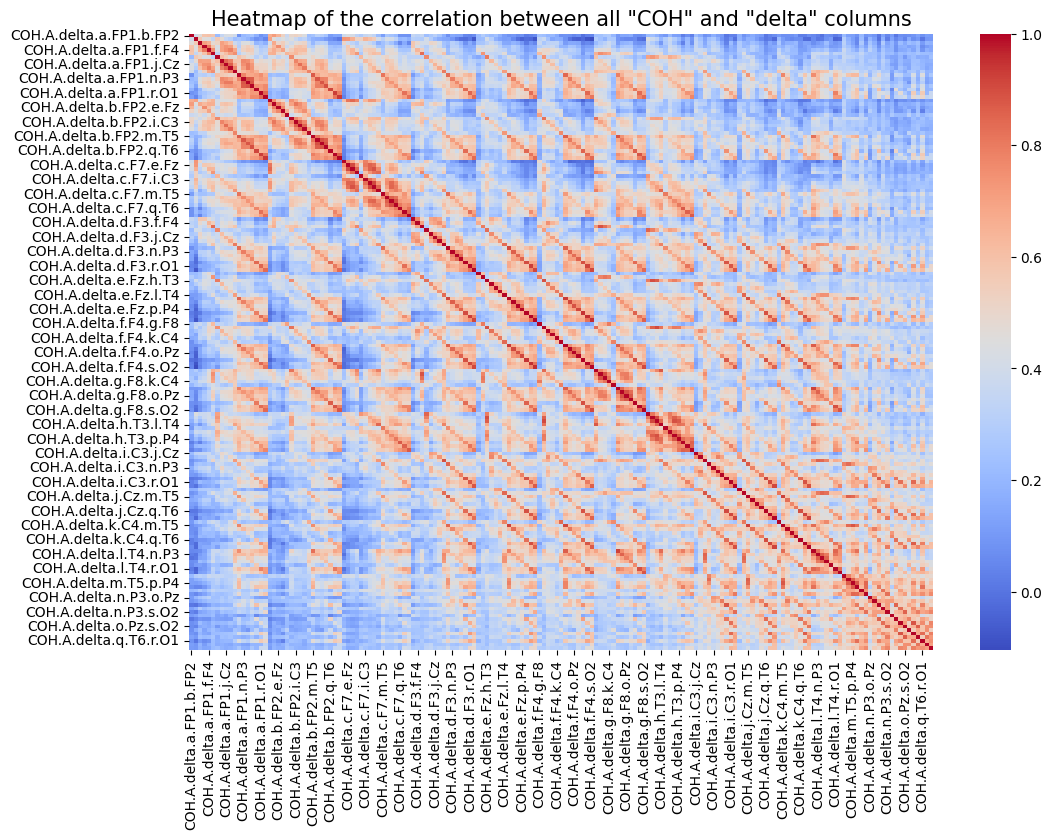

In [1678]:
#heatmap of the correlation between all "COH" columns and "delta" columns of the dataset
plt.figure(figsize=(12,8))
sns.heatmap(data_COH.filter(regex='delta').corr(), cmap='coolwarm')
plt.title('Heatmap of the correlation between all "COH" and "delta" columns',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

### Subtipo Theta

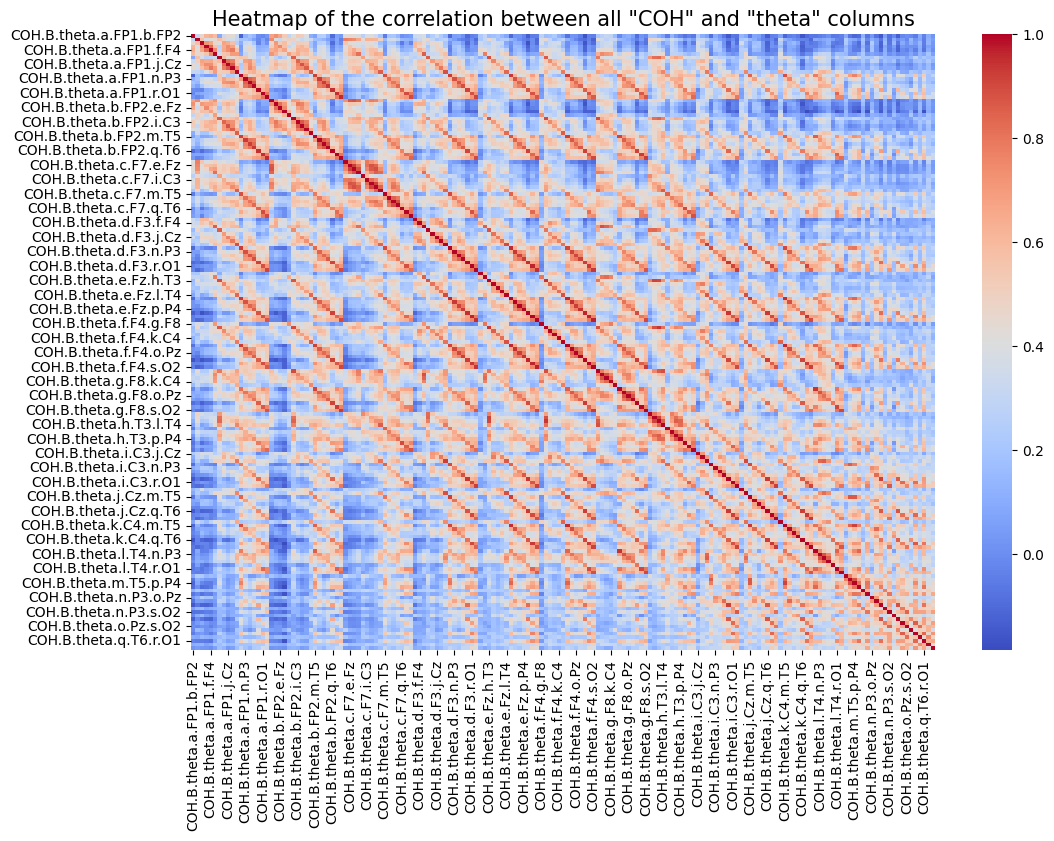

In [1679]:
#heatmap of the correlation between all "COH" columns and "theta" columns of the dataset
plt.figure(figsize=(12,8))
sns.heatmap(data_COH.filter(regex='theta').corr(), cmap='coolwarm')
plt.title('Heatmap of the correlation between all "COH" and "theta" columns',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

# Análisis de Componentes Principales (PCA)

El análisis de componentes principales es una herramienta que nos sirve para reducir la dimensionalidad de un espacio, teniendo en consideración la extensión de los datos, es una buena técnica para estudiar los datos de EEG. Se crea un modelo PCA de 2 componentes principales, el objetivo es conocer cuales son los componentes con mayor importancia en el espacio muestral.

In [1680]:
#copy original data to a new dataframe to avoid changing the original data
PCA_data = data.copy()
#create a PCA model with 2 components
pca = PCA(n_components=2)
#fit the model to the data, remove the column "Date" from the data
pca.fit(PCA_data)
#transform the data
pca_data = pca.transform(PCA_data)
#check the shape of the data
pca_data.shape

(312, 2)

## Modelo sin Escalar

Se realiza una visualización de la dispersión de puntos mediante un scatter plot con la finalidad de conocer su distribución.

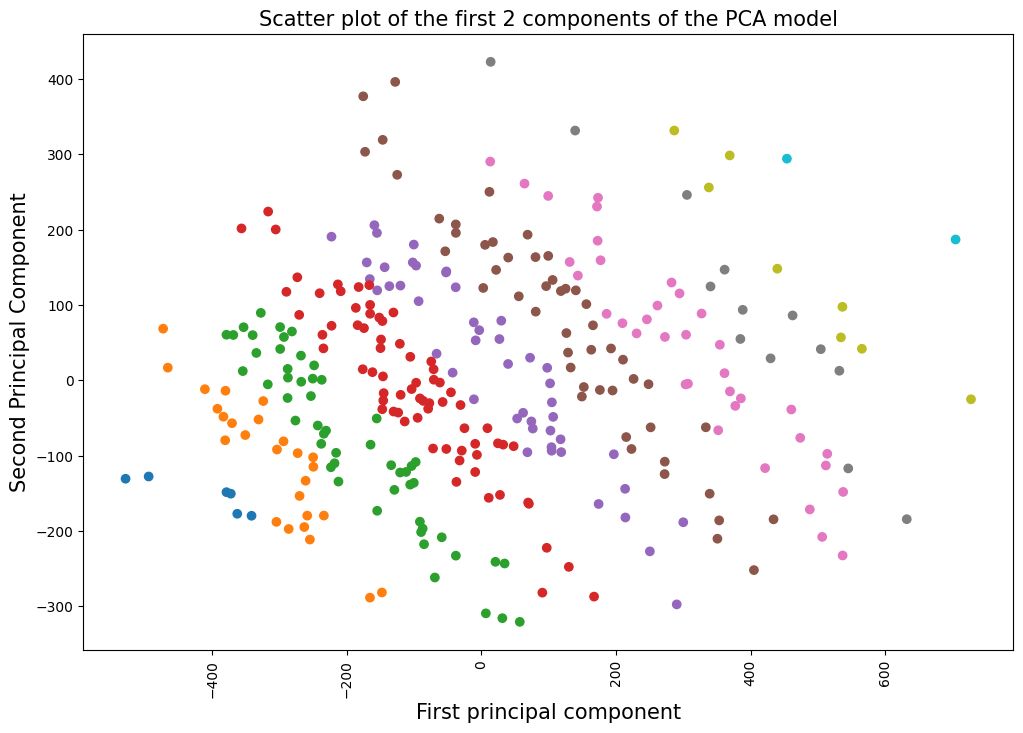

In [1681]:
#plot the first 2 components of the PCA model
plt.figure(figsize=(12,8))
#color the points according to pca_data[:,0] and pca_data[:,1]
c = pca_data[:,0] + pca_data[:,1]
plt.scatter(pca_data[:,0], pca_data[:,1],c = c, cmap='tab10')
plt.xlabel('First principal component',fontsize=15)
plt.ylabel('Second Principal Component',fontsize=15)
plt.title('Scatter plot of the first 2 components of the PCA model',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


Para tener una mayor claridad del conjunto de datos PCA, se realiza una relación entre el gráfico y los principales desordenes de salud en el EEG.

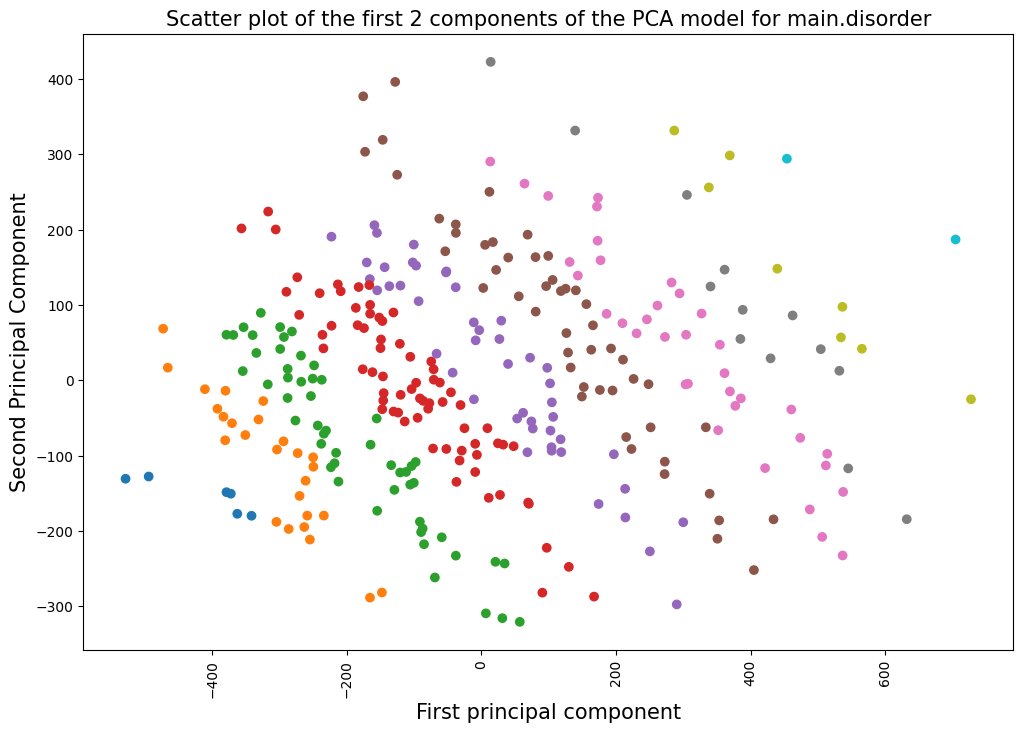

In [1682]:
#scatter plot of PCA data with the first 2 components for 'main.disorder' column
plt.figure(figsize=(12,8))
plt.scatter(pca_data[:,0], pca_data[:,1],c=c, cmap='tab10') #cmap = tab10
plt.xlabel('First principal component',fontsize=15)
plt.ylabel('Second Principal Component',fontsize=15)
plt.title('Scatter plot of the first 2 components of the PCA model for main.disorder',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

<Figure size 1200x800 with 0 Axes>

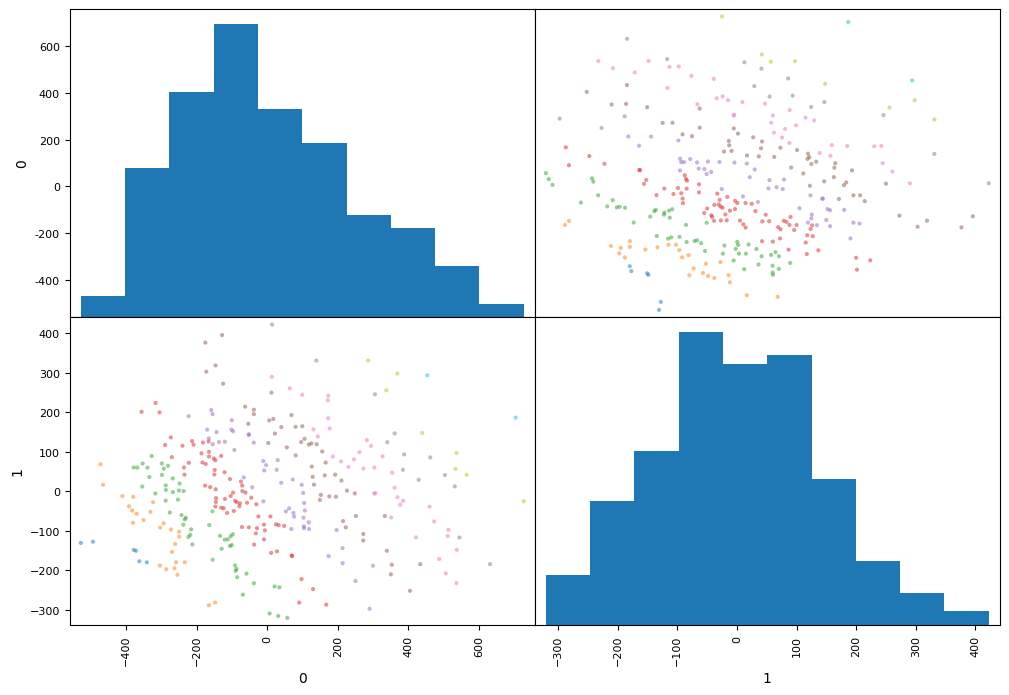

In [1683]:
#scatter matrix of the PCA data with the first 2 components for 'main.disorder' column
plt.figure(figsize=(12,8))
pd.plotting.scatter_matrix(pd.DataFrame(pca_data), c=c, figsize=(12,8), cmap='tab10')
plt.show()

De la misma manera, se realiza una relación entre el PCA y los desordenes especificos encontrados en el dataset.

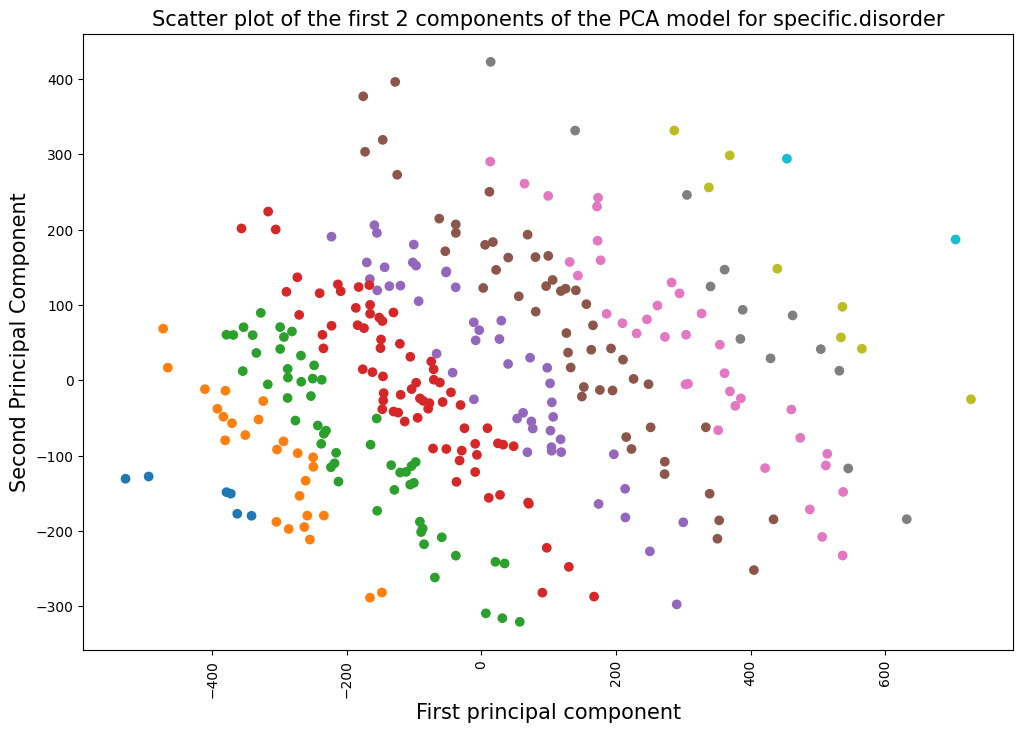

In [1684]:
#scatter plot of PCA data with the first 2 components for 'specific.disorder' column
plt.figure(figsize=(12,8))
plt.scatter(pca_data[:,0], pca_data[:,1], c=c, cmap='tab10')
plt.xlabel('First principal component',fontsize=15)
plt.ylabel('Second Principal Component',fontsize=15)
plt.title('Scatter plot of the first 2 components of the PCA model for specific.disorder',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

<Figure size 1200x800 with 0 Axes>

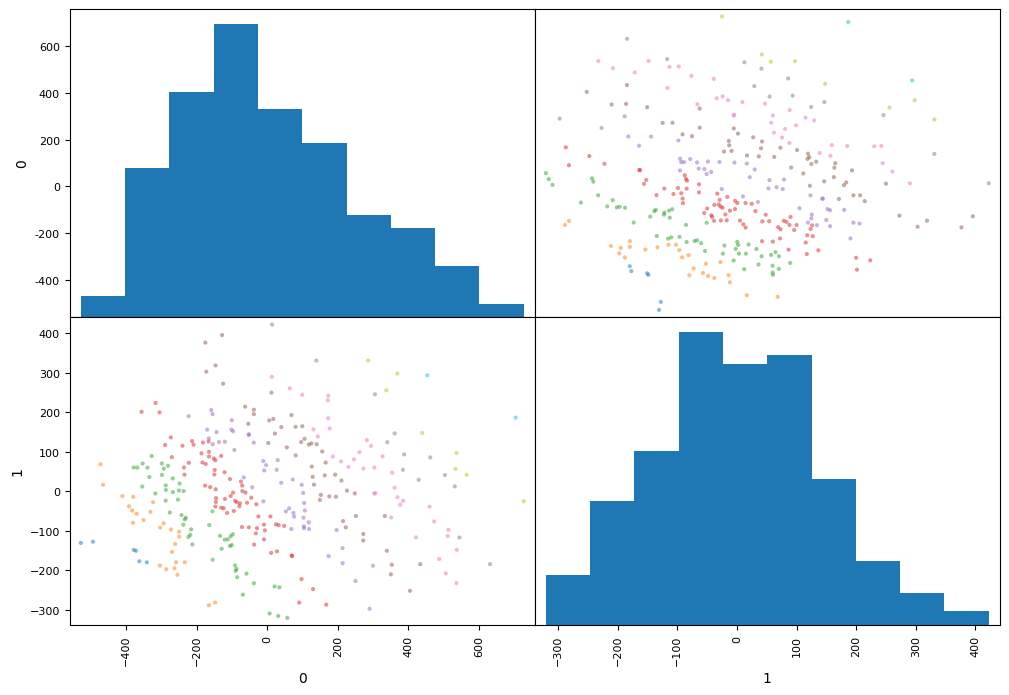

In [1685]:
#scatter matrix of the PCA data with the first 2 components for 'specific.disorder' column
plt.figure(figsize=(12,8))
pd.plotting.scatter_matrix(pd.DataFrame(pca_data), c=c, figsize=(12,8), cmap='tab10')
plt.show()

## Modelo Escalado

Podemos notar que la dimensión de los datos sigue siendo demasiado extensa, en este sentido, es necesario realizar un escalado de los datos mediante una transformación de los mismos.

In [1686]:
#scale the data
scaler = StandardScaler()
scaler.fit(PCA_data)
scaled_data = scaler.transform(PCA_data)

In [1687]:
#fit the PCA model to the scaled data
pca.fit(scaled_data)
#transform the scaled data
pca_data = pca.transform(scaled_data)

Una vez escalados los datos, se realiza el mismo análisis que para el modelo sin escalamiento

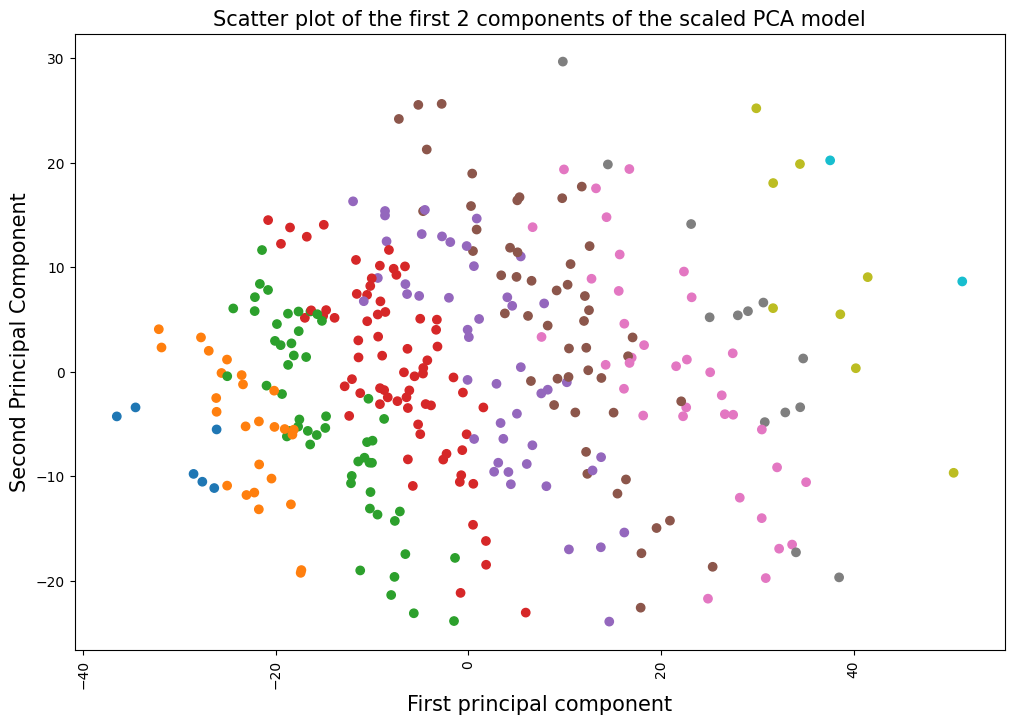

In [1688]:
#plot the first 2 components of the sclaled PCA model
plt.figure(figsize=(12,8))
plt.scatter(pca_data[:,0], pca_data[:,1], c=c, cmap='tab10')
plt.xlabel('First principal component',fontsize=15)
plt.ylabel('Second Principal Component',fontsize=15)
plt.title('Scatter plot of the first 2 components of the scaled PCA model',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

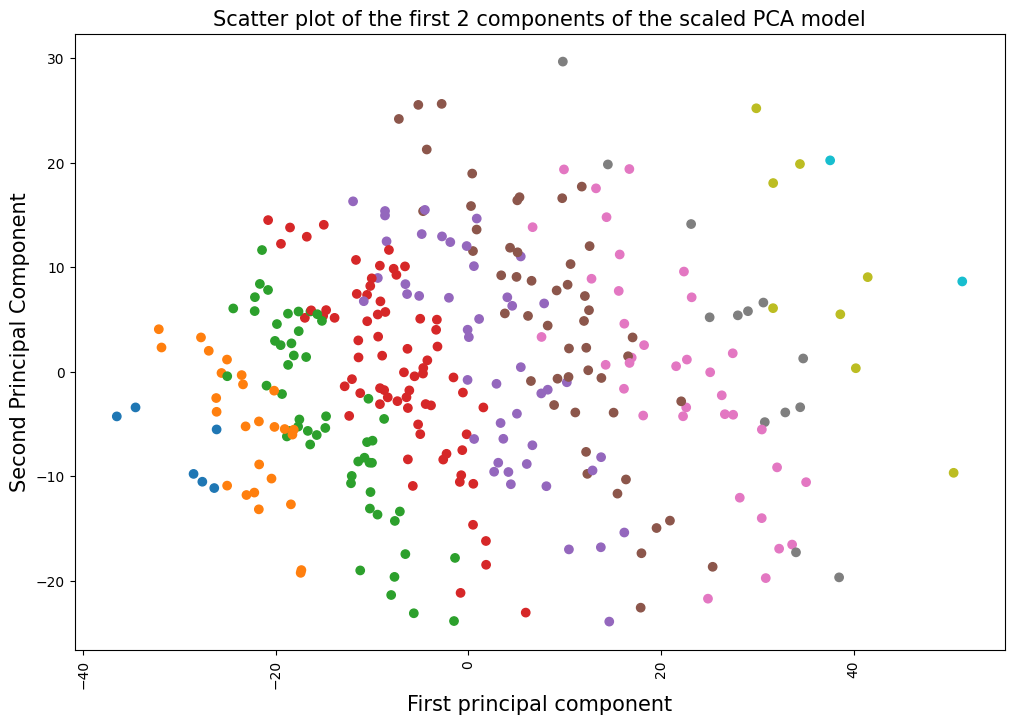

In [1689]:
#scatter plot of scaled PCA data with the first 2 components for 'main.disorder' column
plt.figure(figsize=(12,8))
plt.scatter(pca_data[:,0], pca_data[:,1], c=c, cmap='tab10')
plt.xlabel('First principal component',fontsize=15)
plt.ylabel('Second Principal Component',fontsize=15)
plt.title('Scatter plot of the first 2 components of the scaled PCA model',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

<Figure size 1200x800 with 0 Axes>

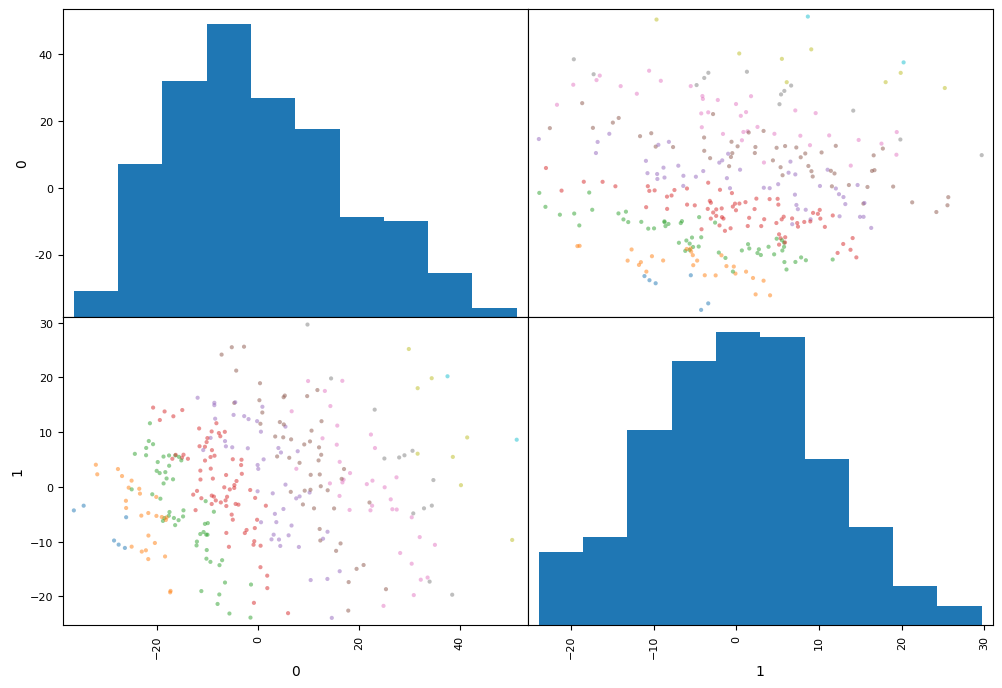

In [1690]:
#scatter matrix of the scaled PCA data with the first 2 components for 'main.disorder' column
plt.figure(figsize=(12,8))
pd.plotting.scatter_matrix(pd.DataFrame(pca_data), c=c, figsize=(12,8), cmap='tab10')
plt.show()

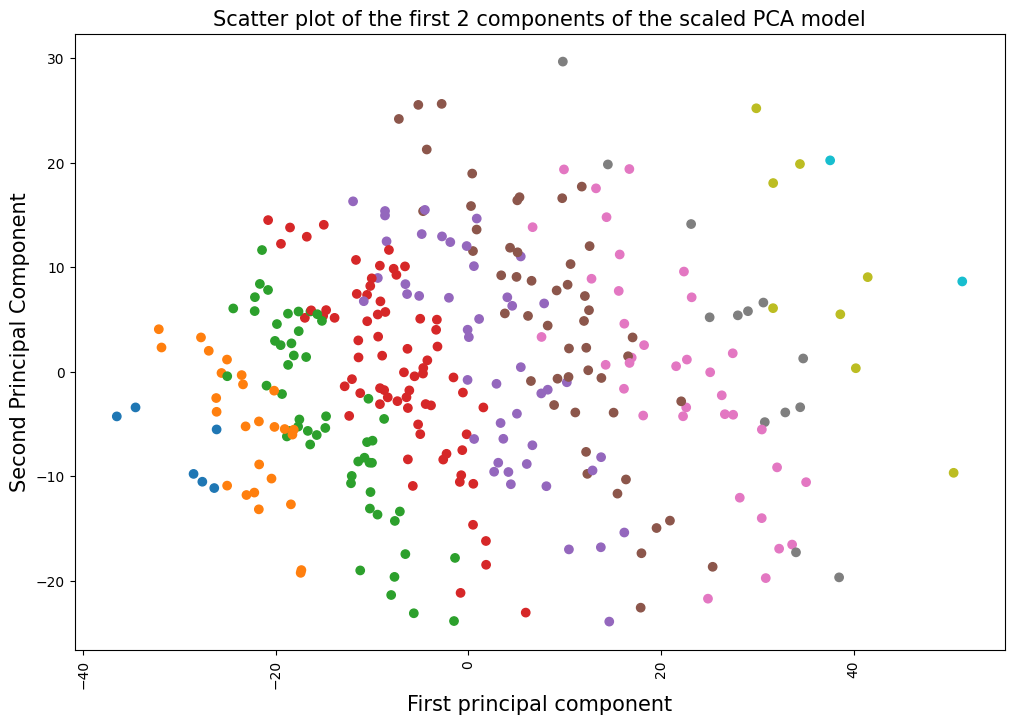

In [1691]:
#scatter plot of scaled PCA data with the first 2 components for 'specific.disorder' column
plt.figure(figsize=(12,8))
plt.scatter(pca_data[:,0], pca_data[:,1], c=c, cmap='tab10')
plt.xlabel('First principal component',fontsize=15)
plt.ylabel('Second Principal Component',fontsize=15)
plt.title('Scatter plot of the first 2 components of the scaled PCA model',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

<Figure size 1200x800 with 0 Axes>

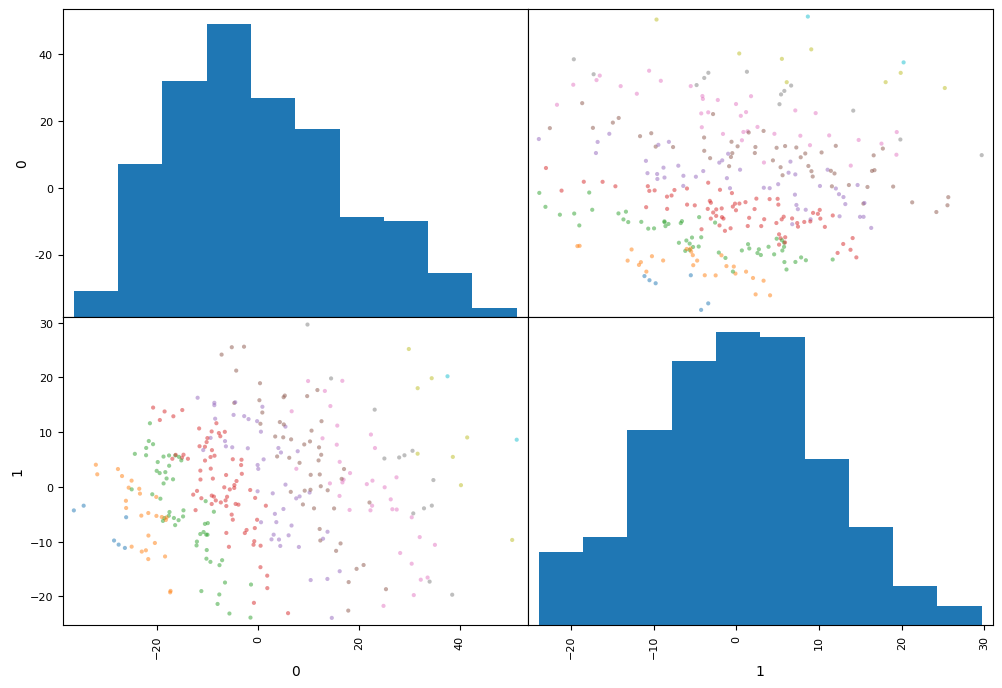

In [1692]:
#scatter matrix of the scaled PCA data with the first 2 components for 'specific.disorder' column
plt.figure(figsize=(12,8))
pd.plotting.scatter_matrix(pd.DataFrame(pca_data), c=c, figsize=(12,8), cmap='tab10')
plt.show()

# Conclusiones

Del análisis de mapas de calor podemos notar que:

* Existe una independencia entre el grupo "AB" y el Grupo "CHO"
* El grupo AB posee dos secciones interesantes a ser evaluadas:
    * El conjunto Delta-Theta
    * El conjunto HighBeta-Gamma
* El grupo CHO posee dos secciones interesantes a ser evaluadas:
    * El conjunto Delta-Theta
    * El conjunto Beta-HighBeta-Gamma 
* Del subtipo Alpha podemos saber que:
    * Existe una fuerte concentración de estas señales en el grupo AB
    * La concentración disminuye a medida que nos acercamos al grupo COH
* Del subtipo Beta podemos saber que:
    * La mayor concentración de señales tipo beta se encuentran en el conjunto de COH, se pueden apreciar 4 divisiones claras dentro del conjunto de datos.
    * El mismo patrón de señales ocurre para el grupo AB.
* Del subtipo Gamma podemos saber que:
    * Si bien no se puede notar a primera vista un patrón claro, se puede apreciar que la intensidad de la señal es mayor que en cualquier otro conjunto.
* Del subtipo Delta podemos saber que:
    * Existe una concentración uniforme en el grupo AB.
* Del grupo Theta podemos saber que:
    * La concentración más intensa de estas señales se encuentra en el grupo AB.

Del análisis PCA podemos notar que:

* El escalamiento de los datos facilita su visualización y comprensión.
* El primer componente del análisis contiene la información más importante del conjunto de datos, el segundo, posee una porción menor, sin embargo, sigue siendo significativo.
* De momento, no se ha podido realizar una separación clara dentro de los grupos de desordenes pricipales y específicos analizados, se necesita continuar el estudio en esta área.